In [1]:
import h5py
from netCDF4 import Dataset
import numpy as np
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt

import xarray as xr

In [2]:
dir0 = Path('/scratch/sbidadi/ai4wind/windai/simulations/maine_sweep/wspd28/lev2_write_netcdf_bcs/post_processing')
f0_stats = Path(dir0, 'abl_statistics167500.nc')
ds_tmp0 = xr.open_dataset(f0_stats, engine='netcdf4')

OSError: [Errno -51] NetCDF: Unknown file format: '/scratch/sbidadi/ai4wind/windai/simulations/maine_sweep/wspd28/lev2_write_netcdf_bcs/post_processing/abl_statistics167500.nc'

In [ ]:
tss = ds_tmp0['time'].values

# Template AMR-Wind boundary condition file

In [ ]:
template_file = Path('/scratch/orybchuk/share/windai/simulations/maine_sweep/wspd12/lev2_write_netcdf_bcs/bndry_file.nc')

with Dataset(template_file, "r") as template:
    print("template.cmptypes", template.cmptypes)
    print("template.data_model", template.data_model)
    print("template.dimensions", template.dimensions)
    print("template.disk_format", template.disk_format)
    print("template.enumtypes", template.enumtypes)
    print("template.file_format", template.file_format)
    print("template.groups", template.groups)
    print("template.keepweakref", template.keepweakref)
    print("template.name", template.name)
    print("template.parent", template.parent)
    print("template.path", template.path)
    print("template.variables", template.variables)
    print("template.vltypes", template.vltypes)

In [ ]:
### Look at the dimensions
with Dataset(template_file, "r") as template:
    print(template.dimensions)
    print()
    print(type(template.dimensions))
    print()
    print(template.dimensions['sdim'])
    print(template.dimensions['pdim'])
    print(template.dimensions['vdim'])
    print(template.dimensions['nt'])
    
    print(len(template.dimensions['pdim']))

In [ ]:
with Dataset(template_file, "r") as template:
    print(template.variables)

In [ ]:
### Look at the xlo/ylo subgroups in detail
with Dataset(template_file, "r") as template:
    print(template['xlo'].variables)
    print(template['xlo']['normal'][:])
    print(template['xlo']['side'][:])
    print(template['xlo']['perpendicular'][:])

In [ ]:
with Dataset(template_file, "r") as template:
    print(template['xlo/level_0'].variables)
    print()
    print(template['xlo/level_0'].variables['lengths'][:])
    print(template['xlo/level_0'].variables['lo'][:])
    print(template['xlo/level_0'].variables['hi'][:])
    print(template['xlo/level_0'].variables['dx'][:])
    print(template['xlo/level_0'].variables['velocity'].shape)
    print(template['xlo/level_0'].variables['temperature'].shape)
#    print(template['xlo/level_0'].variables['vof'].shape)

In [ ]:
with Dataset(template_file, "r") as template:
    print(template['xlo/level_1'].variables)
    print()
    print(template['xlo/level_1'].variables['lengths'][:])
    print(template['xlo/level_1'].variables['lo'][:])
    print(template['xlo/level_1'].variables['hi'][:])
    print(template['xlo/level_1'].variables['dx'][:])
    print(template['xlo/level_1'].variables['velocity'].shape)
    print(template['xlo/level_1'].variables['temperature'].shape)

In [ ]:
with Dataset(template_file, "r") as template:
    print(template['xlo/level_2'].variables)
    print()
    print(template['xlo/level_2'].variables['lengths'][:])
    print(template['xlo/level_2'].variables['lo'][:])
    print(template['xlo/level_2'].variables['hi'][:])
    print(template['xlo/level_2'].variables['dx'][:])
    print(template['xlo/level_2'].variables['velocity'].shape)
    print(template['xlo/level_2'].variables['temperature'].shape)

# Create a boundary condition file

In [3]:
### User inputs
#parent_dir = Path('/scratch/sbidadi/ai4wind/windai/simulations/maine_sweep/wspd28/lev2_write_netcdf_bcs_dt_0.01')
parent_dir = Path('/scratch/sbidadi/ai4wind/windai/simulations/maine_sweep/wspd28/lev2_write_netcdf_bcs')
data_file = Path(parent_dir, 'bndry_file.nc')

outfile = Path('/scratch/sbidadi/ai4wind', 'amrwind_wspd_28_dt_0.03_inflow_bc.nc')
#outfile = Path('/scratch/sbidadi/ai4wind', 'amrwind_wspd_28_dt_0.01_inflow_bc.nc')

In [4]:
with Dataset(data_file, "r") as input:
    print("input.cmptypes", input.cmptypes)
    print("input.data_model", input.data_model)
    print("input.dimensions", input.dimensions)
    print("input.disk_format", input.disk_format)
    print("input.enumtypes", input.enumtypes)
    print("input.file_format", input.file_format)
    print("input.groups", input.groups)
    print("input.keepweakref", input.keepweakref)
    print("input.name", input.name)
    print("input.parent", input.parent)
    print("input.path", input.path)
    print("input.variables", input.variables)
    print("input.vltypes", input.vltypes)
    time_size = input['time'].size

input.cmptypes {}
input.data_model NETCDF4
input.dimensions {'sdim': <class 'netCDF4._netCDF4.Dimension'>: name = 'sdim', size = 1, 'pdim': <class 'netCDF4._netCDF4.Dimension'>: name = 'pdim', size = 2, 'vdim': <class 'netCDF4._netCDF4.Dimension'>: name = 'vdim', size = 3, 'nt': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'nt', size = 10000}
input.disk_format HDF5
input.enumtypes {}
input.file_format NETCDF4
input.groups {'xlo': <class 'netCDF4._netCDF4.Group'>
group /xlo:
    dimensions(sizes): 
    variables(dimensions): int32 normal(), int32 side(), int32 perpendicular(pdim)
    groups: level_0, level_1, level_2}
input.keepweakref False
input.name /
input.parent None
input.path /
input.variables {'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(nt)
unlimited dimensions: nt
current shape = (10000,)
filling on, default _FillValue of 9.969209968386869e+36 used}
input.vltypes {}


In [5]:
########### Create laminar zone for the last 5 minute of simulation data ###########
Niter_lz = 10000

In [6]:
with Dataset(data_file, "r") as input:
    print(input['xlo/level_0'].variables)
    print()
    print(input['xlo/level_0'].variables['lengths'][:])
    print(input['xlo/level_0'].variables['lo'][:])
    print(input['xlo/level_0'].variables['hi'][:])
    print(input['xlo/level_0'].variables['dx'][:])
    print(input['xlo/level_0'].variables['velocity'].shape)
    print(input['xlo/level_0'].variables['temperature'].shape)
#    print(input['xlo/level_0'].variables['vof'].shape)
    
    print(input['xlo']['normal'][:])
    print(input['xlo']['side'][:])
    print(input['xlo']['perpendicular'][:])

    # read all the variables:
    time_bc = input['time'][:]
    ntime = input['time'].shape
    
    lengths0 = input['xlo/level_0'].variables['lengths'][:]
    lo0 = input['xlo/level_0'].variables['lo'][:]
    hi0 = input['xlo/level_0'].variables['hi'][:]
    grid_size0 = input['xlo/level_0'].variables['dx'][:]
    
    # read the velocity and temperature:
    xlo0_xvelocity_input = input['xlo/level_0'].variables['velocity'][-Niter_lz:,:,:,0].astype(np.float32)
    xlo0_yvelocity_input = input['xlo/level_0'].variables['velocity'][-Niter_lz:,:,:,1].astype(np.float32)
    xlo0_zvelocity_input = input['xlo/level_0'].variables['velocity'][-Niter_lz:,:,:,2].astype(np.float32)
    xlo0_temperature_input = input['xlo/level_0'].variables['temperature'][-Niter_lz:,:,:].astype(np.float32)

{'lengths': <class 'netCDF4._netCDF4.Variable'>
float64 lengths(pdim)
path = /xlo/level_0
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lo': <class 'netCDF4._netCDF4.Variable'>
float64 lo(pdim)
path = /xlo/level_0
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'hi': <class 'netCDF4._netCDF4.Variable'>
float64 hi(pdim)
path = /xlo/level_0
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'dx': <class 'netCDF4._netCDF4.Variable'>
float64 dx(pdim)
path = /xlo/level_0
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'velocity': <class 'netCDF4._netCDF4.Variable'>
float64 velocity(nt, ny, nz, vdim)
path = /xlo/level_0
unlimited dimensions: nt
current shape = (10000, 320, 240, 3)
filling on, default _FillValue of 9.969209968386869e+36 used, 'temperature': <class 

In [7]:
print(ntime)
print(time_bc)

(10000,)
[11169.61549105 11169.64549105 11169.67549105 ... 11469.52549106
 11469.55549106 11469.58549106]


In [8]:
with Dataset(data_file, "r") as input:
    print(input['xlo/level_1'].variables)
    print()
    print(input['xlo/level_1'].variables['lengths'][:])
    print(input['xlo/level_1'].variables['lo'][:])
    print(input['xlo/level_1'].variables['hi'][:])
    print(input['xlo/level_1'].variables['dx'][:])
    print(input['xlo/level_1'].variables['velocity'].shape)
    print(input['xlo/level_1'].variables['temperature'].shape)
#    print(input['xlo/level_0'].variables['vof'].shape)
    
    print(input['xlo']['normal'][:])
    print(input['xlo']['side'][:])
    print(input['xlo']['perpendicular'][:])

    # read all the variables:
#    time_bc = input['time'][:]
#    ntime = input['time'].shape
    
    lengths1 = input['xlo/level_1'].variables['lengths'][:]
    lo1 = input['xlo/level_1'].variables['lo'][:]
    hi1 = input['xlo/level_1'].variables['hi'][:]
    grid_size1 = input['xlo/level_1'].variables['dx'][:]
    
    # read the velocity and temperature:
    xlo1_xvelocity_input = input['xlo/level_1'].variables['velocity'][-Niter_lz:,:,:,0].astype(np.float32)
    xlo1_yvelocity_input = input['xlo/level_1'].variables['velocity'][-Niter_lz:,:,:,1].astype(np.float32)
    xlo1_zvelocity_input = input['xlo/level_1'].variables['velocity'][-Niter_lz:,:,:,2].astype(np.float32)
    xlo1_temperature_input = input['xlo/level_1'].variables['temperature'][-Niter_lz:,:,:].astype(np.float32)

{'lengths': <class 'netCDF4._netCDF4.Variable'>
float64 lengths(pdim)
path = /xlo/level_1
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lo': <class 'netCDF4._netCDF4.Variable'>
float64 lo(pdim)
path = /xlo/level_1
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'hi': <class 'netCDF4._netCDF4.Variable'>
float64 hi(pdim)
path = /xlo/level_1
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'dx': <class 'netCDF4._netCDF4.Variable'>
float64 dx(pdim)
path = /xlo/level_1
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'velocity': <class 'netCDF4._netCDF4.Variable'>
float64 velocity(nt, ny, nz, vdim)
path = /xlo/level_1
unlimited dimensions: nt
current shape = (10000, 640, 40, 3)
filling on, default _FillValue of 9.969209968386869e+36 used, 'temperature': <class '

In [9]:
with Dataset(data_file, "r") as input:
    print(input['xlo/level_2'].variables)
    print(input['xlo/level_2'].variables['lengths'][:])
    print(input['xlo/level_2'].variables['lo'][:])
    print(input['xlo/level_2'].variables['hi'][:])
    print(input['xlo/level_2'].variables['dx'][:])
    print(input['xlo/level_2'].variables['velocity'].shape)
    print(input['xlo/level_2'].variables['temperature'].shape)
#    print(input['xlo/level_0'].variables['vof'].shape)
    
    print(input['xlo']['normal'][:])
    print(input['xlo']['side'][:])
    print(input['xlo']['perpendicular'][:])

    # read all the variables:
#    time_bc = input['time'][:]
#    ntime = input['time'].shape
    
    lengths2 = input['xlo/level_2'].variables['lengths'][:]
    lo2 = input['xlo/level_2'].variables['lo'][:]
    hi2 = input['xlo/level_2'].variables['hi'][:]
    grid_size2 = input['xlo/level_2'].variables['dx'][:]
    
    # read the velocity and temperature:
    xlo2_xvelocity_input = input['xlo/level_2'].variables['velocity'][-Niter_lz:,:,:,0].astype(np.float32)
    xlo2_yvelocity_input = input['xlo/level_2'].variables['velocity'][-Niter_lz:,:,:,1].astype(np.float32)
    xlo2_zvelocity_input = input['xlo/level_2'].variables['velocity'][-Niter_lz:,:,:,2].astype(np.float32)
    xlo2_temperature_input = input['xlo/level_2'].variables['temperature'][-Niter_lz:,:,:].astype(np.float32)

{'lengths': <class 'netCDF4._netCDF4.Variable'>
float64 lengths(pdim)
path = /xlo/level_2
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lo': <class 'netCDF4._netCDF4.Variable'>
float64 lo(pdim)
path = /xlo/level_2
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'hi': <class 'netCDF4._netCDF4.Variable'>
float64 hi(pdim)
path = /xlo/level_2
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'dx': <class 'netCDF4._netCDF4.Variable'>
float64 dx(pdim)
path = /xlo/level_2
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'velocity': <class 'netCDF4._netCDF4.Variable'>
float64 velocity(nt, ny, nz, vdim)
path = /xlo/level_2
unlimited dimensions: nt
current shape = (10000, 1280, 48, 3)
filling on, default _FillValue of 9.969209968386869e+36 used, 'temperature': <class 

# Level 0

## Old domain

In [10]:
ilengths0 = lengths0.astype(int) # domain size in the y and z dir.
ncells0 = xlo0_xvelocity_input.shape

nx0 = 1
ny0 = ncells0[1]
nz0 = ncells0[2]

Ly0 = ilengths0[0]
Lz0 = ilengths0[1]
print(Ly0, Lz0)

dy0 = grid_size0[0]
dz0 = grid_size0[1]

x0_velocity_bc = xlo0_xvelocity_input.copy()
y0_velocity_bc = xlo0_yvelocity_input.copy()
z0_velocity_bc = xlo0_zvelocity_input.copy()
temperature0_bc = xlo0_temperature_input.copy()
print(x0_velocity_bc.shape)

2400 1800
(10000, 320, 240)


In [11]:
# mean velocity vs. z
uvel0_mean = np.mean(x0_velocity_bc,axis=(0,1)) # mean in both y dir. and time
vvel0_mean  = np.mean(y0_velocity_bc,axis=(0,1)) # mean in both y dir. and time
wvel0_mean  = np.mean(z0_velocity_bc,axis=(0,1)) # mean in both y dir. and time
temperature0_mean  = np.mean(temperature0_bc[-4000:],axis=(0,1)) # mean in both y dir. and time

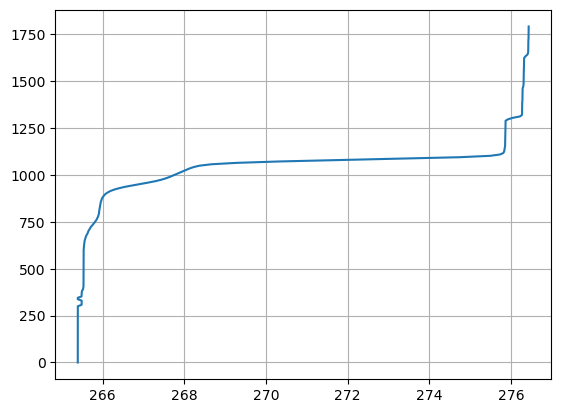

In [12]:
# plot of mean temperature
zz = np.arange(lo0[1], hi0[1], dz0)
plt.figure()
plt.grid()
plt.plot(temperature0_mean,zz)

#zz = np.arange(lo0[1], hi0[1], dz0)
#plt.figure()
#plt.grid()
#plt.plot(temperature0_bc,zz)

# Padding the existing domain with a laminar zone

In [13]:
# Calculate the number of cells and domain size
# Additional increment in the domain:
#delta_Ly = 300
#delta_Lz = 120

delta_Ly = 1020
delta_Lz = 1020

# Number of new cells
Ny0 = (np.rint((Ly0+delta_Ly)/grid_size0[0])).astype(int)
Nz0 = (np.rint((Lz0+delta_Lz)/grid_size0[1])).astype(int)
print(ny0, nz0)
print(Ny0, Nz0)

# New domain size
new_ilengths0 = [Ly0+delta_Ly, Lz0+delta_Lz]
Ly0_new = new_ilengths0[0]
Lz0_new = new_ilengths0[1]
print(Ly0, Lz0)
print(Ly0_new, Lz0_new)

# Extents of the new domain
ylo0 = lo0[0] 
yhi0 = hi0[0] + delta_Ly

zlo0 = lo0[1]
zhi0 = hi0[1] + delta_Lz

print(ntime)

#timesteps = (np.ceil(ntime[0]/10)).astype(int)
timesteps = ntime[0]
print(timesteps)

# Variables for storing velocity and temperature fields in the new domain
velocity0_bc_new = np.zeros((timesteps, Ny0, Nz0, 3),dtype='f')
temperature0_bc_new = np.full((timesteps, Ny0, Nz0),np.max(temperature0_mean))
#temperature0_bc_new = np.zeros((timesteps, Ny0, Nz0),dtype='f')

320 240
456 376
2400 1800
3420 2820
(10000,)
10000


In [14]:
# region of the new domain where information from the old domain need to be copied:
start_y = int(delta_Ly/2)
start_z = int(delta_Lz/2)
print(start_y, start_z)

end_y = start_y + Ly0
end_z = start_z + Lz0

# Fill data in the new domain for regions between yloc < start_y or yloc > end_y and zloc > start_z and zloc < end_z
# This is done by copying the variable profiles from the old domain data to the new

# Number of points from the left and bottom boundary to the location where filling begins:
Ny_from_left_boundary = (start_y/grid_size0[0]).astype(int) 
Nz_from_bottom_boundary = (start_z/grid_size0[1]).astype(int)  

uvelocity0_bc_new = np.zeros((Ny0, Nz0),dtype='f')
vvelocity0_bc_new = np.zeros((Ny0, Nz0),dtype='f')
wvelocity0_bc_new = np.zeros((Ny0, Nz0),dtype='f')
#T0_bc_new = np.zeros((Ny0, Nz0),dtype='f')
T0_bc_new = np.zeros((Ny0, Nz0),np.max(temperature0_mean))

for j in range(Ny0): # in the y dir
    for k in range(Nz0): # in the z dir
        yloc = j*dy0
        zloc = k*dz0

        if ((yloc < start_y or yloc > end_y) and (zloc > start_z and zloc < end_z)):
            uvelocity0_bc_new[:,k] = uvel0_mean[k-Nz_from_bottom_boundary]
            vvelocity0_bc_new[:,k] = vvel0_mean[k-Nz_from_bottom_boundary]
            wvelocity0_bc_new[:,k] = wvel0_mean[k-Nz_from_bottom_boundary]
            T0_bc_new[:,k] = temperature0_mean[k-Nz_from_bottom_boundary]

velocity0_bc_new[:,:,:,0] = uvelocity0_bc_new[:,:]
velocity0_bc_new[:,:,:,1] = vvelocity0_bc_new[:,:]
velocity0_bc_new[:,:,:,2] = wvelocity0_bc_new[:,:]
temperature0_bc_new[:,:,:] = T0_bc_new[:,:]

510 510


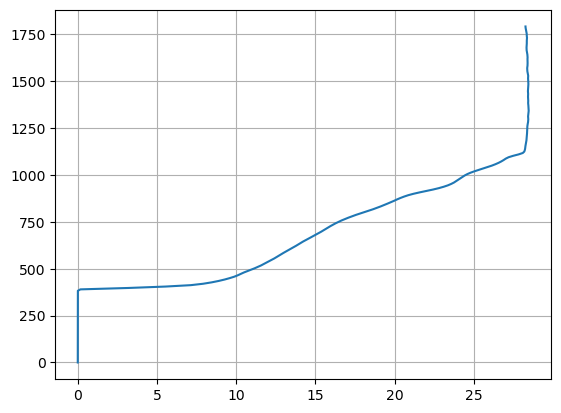

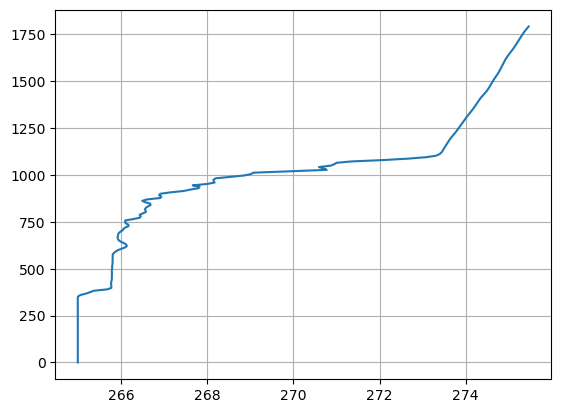

In [15]:
# Profiles of u velocity
#zz = np.arange(lo[1], hi[1], dz)
#plt.figure()
#plt.grid()
#plt.plot(uvel_mean,zz)

zz = np.arange(lo0[1], hi0[1], dz0)
plt.figure()
plt.grid()
plt.plot(uvel0_mean,zz)

zz = np.arange(lo0[1], hi0[1], dz0)
plt.figure()
plt.grid()
plt.plot(temperature0_bc[-10,160,:],zz)

#zz = np.arange(zlo0, zhi0, dz0)
#plt.figure()
#plt.grid()
#plt.plot(velocity0_bc_new[-1,100,:,0],zz)

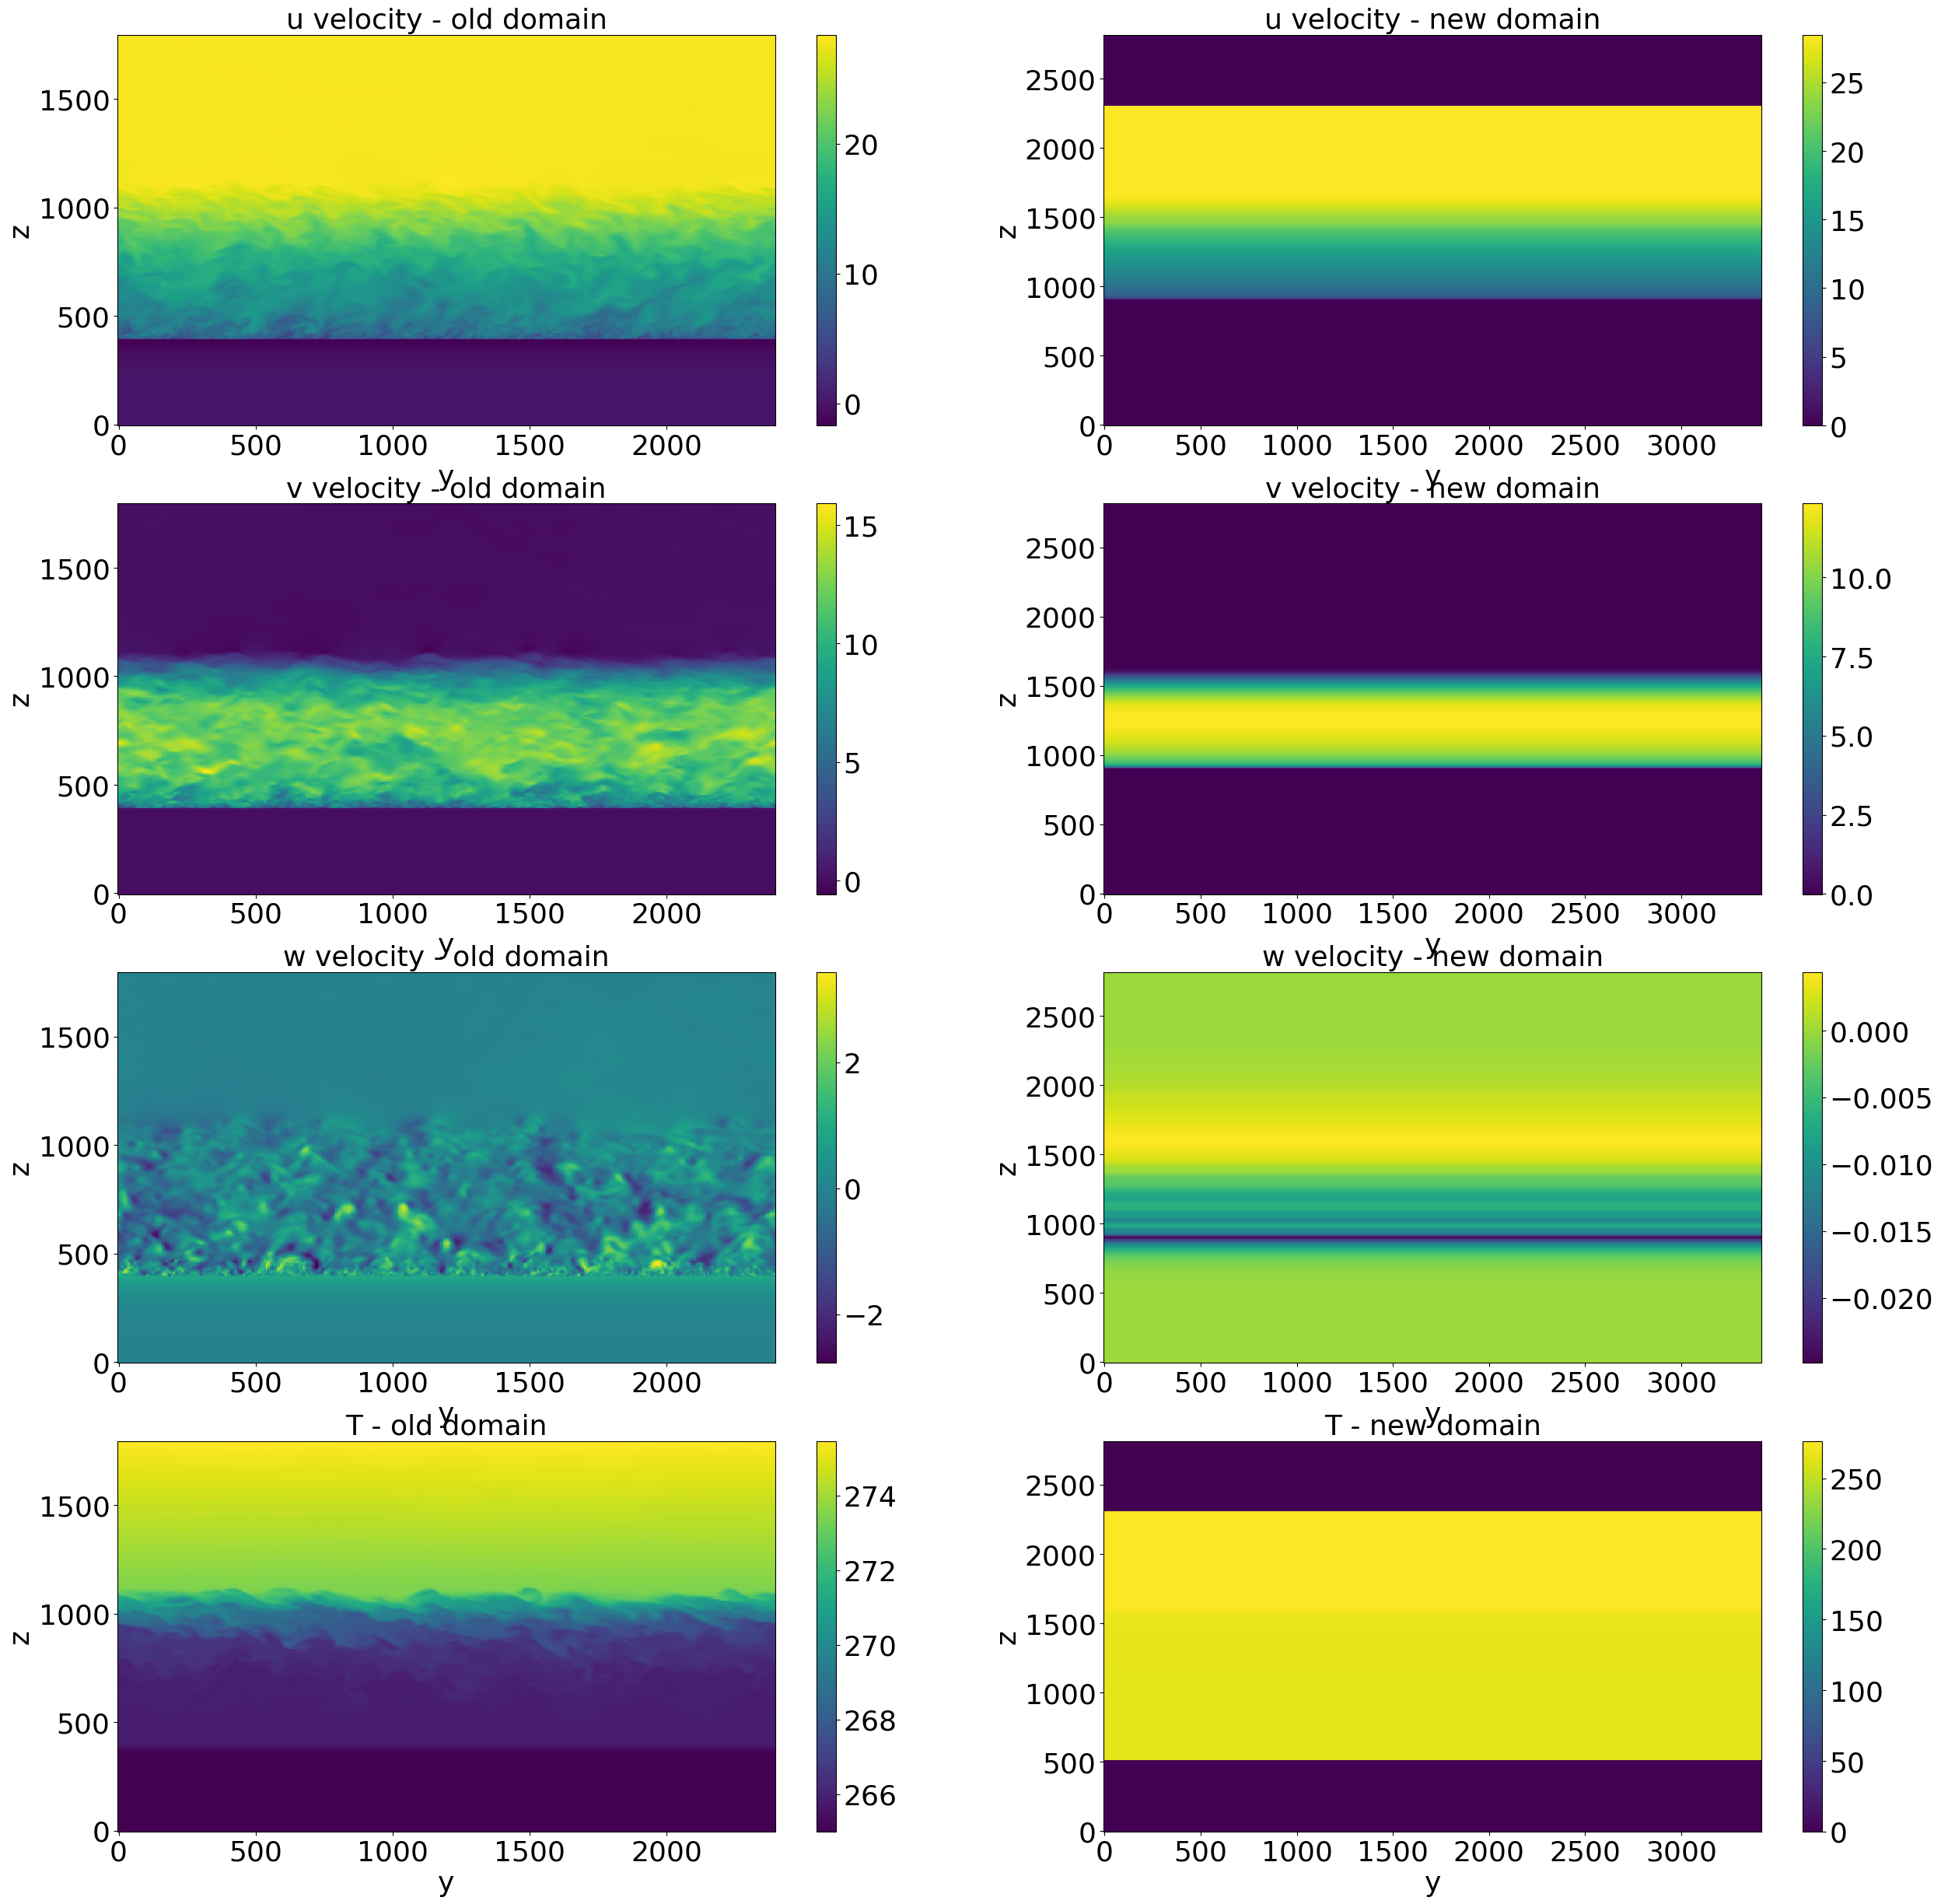

In [16]:
mpl.rcParams['axes.titlesize'] = 26
mpl.rcParams['axes.labelsize'] = 26
mpl.rcParams['legend.fontsize'] = 26
mpl.rcParams['xtick.labelsize'] = 26
mpl.rcParams['ytick.labelsize'] = 26

fig, axs = plt.subplots(nrows=4,ncols=2,figsize=(30,30))

# 1. u velocity:
yy = np.arange(lo0[0], hi0[0], dy0)
zz = np.arange(lo0[1], hi0[1], dz0)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
uvel = axs[0,0].pcolormesh(YY, ZZ, x0_velocity_bc[timesteps-1,:,:])
axs[0,0].set_xlabel("y")
axs[0,0].set_ylabel("z")
axs[0,0].set_title("u velocity - old domain")
fig.colorbar(uvel, ax=axs[0,0])

yy_new = np.arange(ylo0, yhi0, dy0)
zz_new = np.arange(zlo0, zhi0, dz0)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
uvel_new = axs[0,1].pcolormesh(YY_new, ZZ_new, velocity0_bc_new[timesteps-1,:,:,0])
axs[0,1].set_xlabel("y")
axs[0,1].set_ylabel("z")
axs[0,1].set_title("u velocity - new domain")
fig.colorbar(uvel_new, ax=axs[0,1])

# 2. v velocity:
yy = np.arange(lo0[0], hi0[0], dy0)
zz = np.arange(lo0[1], hi0[1], dz0)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
vvel = axs[1,0].pcolormesh(YY, ZZ, y0_velocity_bc[timesteps-1,:,:])
axs[1,0].set_xlabel("y")
axs[1,0].set_ylabel("z")
axs[1,0].set_title("v velocity - old domain")
fig.colorbar(vvel, ax=axs[1,0])

yy_new = np.arange(ylo0, yhi0, dy0)
zz_new = np.arange(zlo0, zhi0, dz0)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
vvel_new = axs[1,1].pcolormesh(YY_new, ZZ_new, velocity0_bc_new[timesteps-1,:,:,1])
axs[1,1].set_xlabel("y")
axs[1,1].set_ylabel("z")
axs[1,1].set_title("v velocity - new domain")
fig.colorbar(vvel_new, ax=axs[1,1])

# 3. w velocity:
yy = np.arange(lo0[0], hi0[0], dy0)
zz = np.arange(lo0[1], hi0[1], dz0)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
wvel = axs[2,0].pcolormesh(YY, ZZ, z0_velocity_bc[timesteps-1,:,:])
axs[2,0].set_xlabel("y")
axs[2,0].set_ylabel("z")
axs[2,0].set_title("w velocity - old domain")
fig.colorbar(wvel, ax=axs[2,0])

yy_new = np.arange(ylo0, yhi0, dy0)
zz_new = np.arange(zlo0, zhi0, dz0)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
wvel_new = axs[2,1].pcolormesh(YY_new, ZZ_new, velocity0_bc_new[timesteps-1,:,:,2])
axs[2,1].set_xlabel("y")
axs[2,1].set_ylabel("z")
axs[2,1].set_title("w velocity - new domain")
fig.colorbar(wvel_new, ax=axs[2,1])

# 4. T:
yy = np.arange(lo0[0], hi0[0], dy0)
zz = np.arange(lo0[1], hi0[1], dz0)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
wvel = axs[3,0].pcolormesh(YY, ZZ, temperature0_bc[timesteps-1,:,:])
axs[3,0].set_xlabel("y")
axs[3,0].set_ylabel("z")
axs[3,0].set_title("T - old domain")
fig.colorbar(wvel, ax=axs[3,0])

yy_new = np.arange(ylo0, yhi0, dy0)
zz_new = np.arange(zlo0, zhi0, dz0)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
wvel_new = axs[3,1].pcolormesh(YY_new, ZZ_new, temperature0_bc_new[timesteps-1,:,:])
axs[3,1].set_xlabel("y")
axs[3,1].set_ylabel("z")
axs[3,1].set_title("T - new domain")
fig.colorbar(wvel_new, ax=axs[3,1])

In [17]:
# Polynomial extrapolation:
zlocs_start = np.arange(0.0, start_z, dz0)
zlocs_end = np.arange(end_z, Lz0_new, dz0)
print(np.size(zlocs_start), np.size(zlocs_end))

# For u:
# Generate 2nd order polynomial function for data in the old domain
pstart_u = np.polyfit(zlocs_start, uvel0_mean[0:np.size(zlocs_start)], deg=2)
pend_u = np.polyfit(zlocs_end, uvel0_mean[-np.size(zlocs_end):], deg=2)

# Evaluate the polynomal at specific y values for z < start_z and z > end_z
uvel0_mean_new_start = np.polyval(pstart_u, zlocs_start)
uvel0_mean_new_end = np.polyval(pend_u, zlocs_end)

# Do the same for the other variables
# For v:
pstart_v = np.polyfit(zlocs_start, vvel0_mean[0:np.size(zlocs_start)], deg=2)
pend_v = np.polyfit(zlocs_end, vvel0_mean[-np.size(zlocs_end):], deg=2)

vvel0_mean_new_start = np.polyval(pstart_v, zlocs_start)
vvel0_mean_new_end = np.polyval(pend_v, zlocs_end)

# For w:
pstart_w = np.polyfit(zlocs_start, wvel0_mean[0:np.size(zlocs_start)], deg=2)
pend_w = np.polyfit(zlocs_end, wvel0_mean[-np.size(zlocs_end):], deg=2)

wvel0_mean_new_start = np.polyval(pstart_w, zlocs_start)
wvel0_mean_new_end = np.polyval(pend_w, zlocs_end)

# For T:
pstart_T = np.polyfit(zlocs_start, temperature0_mean[0:np.size(zlocs_start)], deg=2)
pend_T = np.polyfit(zlocs_end, temperature0_mean[-np.size(zlocs_end):], deg=2)

T0_mean_new_start = np.polyval(pstart_T, zlocs_start)
T0_mean_new_end = np.polyval(pend_T, zlocs_end)

# For VOF:
#pstart_vof = np.polyfit(zlocs_start, vof_mean[0:np.size(zlocs_start)], deg=2)
#pend_vof = np.polyfit(zlocs_end, vof_mean[-np.size(zlocs_end):], deg=2)

#vof_mean_new_start = np.polyval(pstart_vof, zlocs_start)
#vof_mean_new_end = np.polyval(pend_vof, zlocs_end)

68 68


In [18]:
# Copy the velocities evaluated for z < start_z and z > end_z at all y locations
for k in range(Nz0): # in the z dir
    zloc = k*dz0

    if (zloc < start_z):
#        velocity0_bc_new[:, :, k, 0] = uvel0_mean_new_start[k]
#        velocity0_bc_new[:, :, k, 1] = vvel0_mean_new_start[k]
#        velocity0_bc_new[:, :, k, 2] = wvel0_mean_new_start[k]
        temperature0_bc_new[:, :, k] = T0_mean_new_start[k]
#        vof_bc_new[:, :, k] = vof_mean_new_start[k]      
    elif (zloc > end_z):
        velocity0_bc_new[:, :, k, 0] = uvel0_mean_new_end[Nz0-k]
        velocity0_bc_new[:, :, k, 1] = vvel0_mean_new_end[Nz0-k]
        velocity0_bc_new[:, :, k, 2] = wvel0_mean_new_end[Nz0-k]
        temperature0_bc_new[:, :, k] = T0_mean_new_end[Nz0-k]
#        vof_bc_new[:, :, k] = vof_mean_new_end[Nz-k]

index_loc = Nz0-np.size(zlocs_end)
velocity0_bc_new[:, :, index_loc, :] = velocity0_bc_new[:, :, index_loc+1, :]
temperature0_bc_new[:, :, index_loc] = temperature0_bc_new[:, :, index_loc+1]
temperature0_bc_new[:, :, np.size(zlocs_end)] = temperature0_bc_new[:, :, np.size(zlocs_end)+1]

In [19]:
# temperature profile:
#zz = np.arange(zlo0, zhi0, dz0)
#plt.figure()
#plt.grid()
#plt.plot(temperature0_bc_new[-1,100,:],zz)

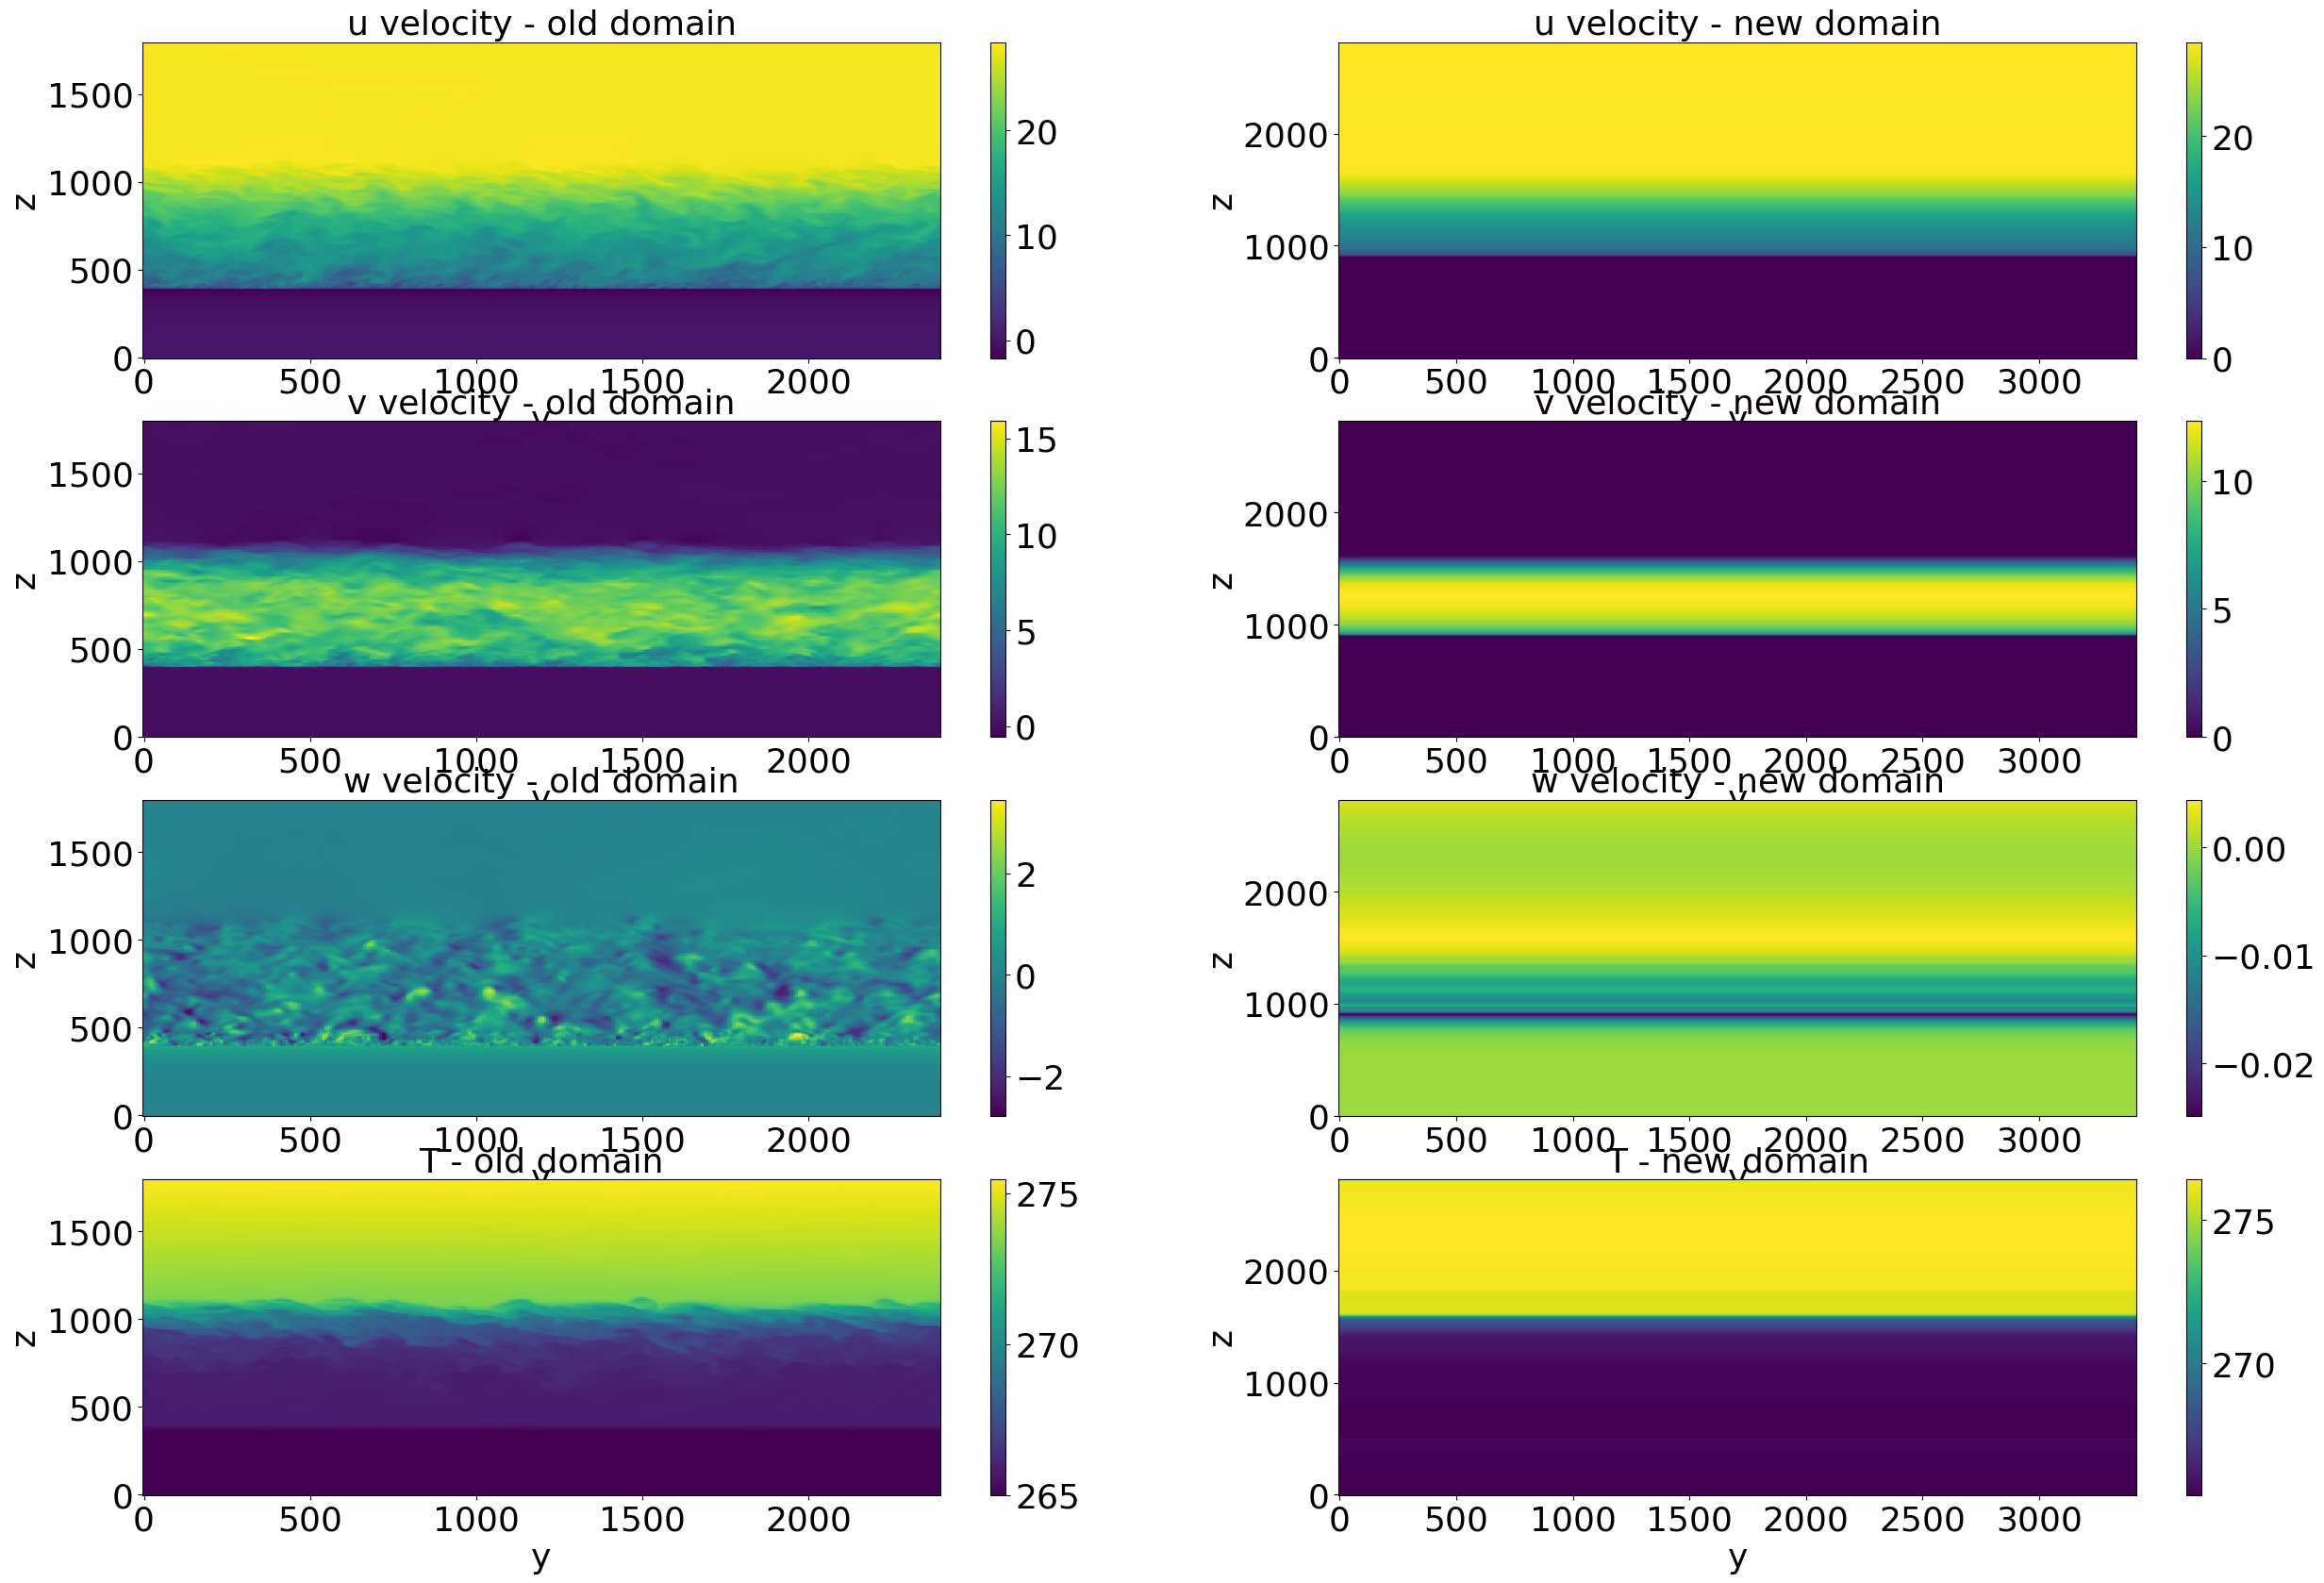

In [20]:
fig, axs = plt.subplots(nrows=4,ncols=2,figsize=(30,20))

# 1. u velocity:
yy = np.arange(lo0[0], hi0[0], dy0)
zz = np.arange(lo0[1], hi0[1], dz0)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
uvel = axs[0,0].pcolormesh(YY, ZZ, x0_velocity_bc[timesteps-1,:,:])
axs[0,0].set_xlabel("y")
axs[0,0].set_ylabel("z")
axs[0,0].set_title("u velocity - old domain")
fig.colorbar(uvel, ax=axs[0,0])

yy_new = np.arange(ylo0, yhi0, dy0)
zz_new = np.arange(zlo0, zhi0, dz0)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
uvel_new = axs[0,1].pcolormesh(YY_new, ZZ_new, velocity0_bc_new[timesteps-1,:,:,0])
axs[0,1].set_xlabel("y")
axs[0,1].set_ylabel("z")
axs[0,1].set_title("u velocity - new domain")
fig.colorbar(uvel_new, ax=axs[0,1])

# 2. v velocity:
yy = np.arange(lo0[0], hi0[0], dy0)
zz = np.arange(lo0[1], hi0[1], dz0)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
vvel = axs[1,0].pcolormesh(YY, ZZ, y0_velocity_bc[timesteps-1,:,:])
axs[1,0].set_xlabel("y")
axs[1,0].set_ylabel("z")
axs[1,0].set_title("v velocity - old domain")
fig.colorbar(vvel, ax=axs[1,0])

yy_new = np.arange(ylo0, yhi0, dy0)
zz_new = np.arange(zlo0, zhi0, dz0)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
vvel_new = axs[1,1].pcolormesh(YY_new, ZZ_new, velocity0_bc_new[timesteps-1,:,:,1])
axs[1,1].set_xlabel("y")
axs[1,1].set_ylabel("z")
axs[1,1].set_title("v velocity - new domain")
fig.colorbar(vvel_new, ax=axs[1,1])

# 3. w velocity:
yy = np.arange(lo0[0], hi0[0], dy0)
zz = np.arange(lo0[1], hi0[1], dz0)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
wvel = axs[2,0].pcolormesh(YY, ZZ, z0_velocity_bc[timesteps-1,:,:])
axs[2,0].set_xlabel("y")
axs[2,0].set_ylabel("z")
axs[2,0].set_title("w velocity - old domain")
fig.colorbar(wvel, ax=axs[2,0])

yy_new = np.arange(ylo0, yhi0, dy0)
zz_new = np.arange(zlo0, zhi0, dz0)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
wvel_new = axs[2,1].pcolormesh(YY_new, ZZ_new, velocity0_bc_new[timesteps-1,:,:,2])
axs[2,1].set_xlabel("y")
axs[2,1].set_ylabel("z")
axs[2,1].set_title("w velocity - new domain")
fig.colorbar(wvel_new, ax=axs[2,1])

# 4. T:
yy = np.arange(lo0[0], hi0[0], dy0)
zz = np.arange(lo0[1], hi0[1], dz0)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
wvel = axs[3,0].pcolormesh(YY, ZZ, temperature0_bc[timesteps-1,:,:])
axs[3,0].set_xlabel("y")
axs[3,0].set_ylabel("z")
axs[3,0].set_title("T - old domain")
fig.colorbar(wvel, ax=axs[3,0])

yy_new = np.arange(ylo0, yhi0, dy0)
zz_new = np.arange(zlo0, zhi0, dz0)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
wvel_new = axs[3,1].pcolormesh(YY_new, ZZ_new, temperature0_bc_new[timesteps-1,:,:])
axs[3,1].set_xlabel("y")
axs[3,1].set_ylabel("z")
axs[3,1].set_title("T - new domain")
fig.colorbar(wvel_new, ax=axs[3,1])

In [21]:
# Region in the interior of the new domain where old data needs to be filled:
start_y = int(delta_Ly/2)
start_z = int(delta_Lz/2)

end_y = start_y + Ly0
end_z = start_z + Lz0

# Number of points from the left and bottom boundaries to the location where filling begins:
Ny_from_left_boundary = (start_y/grid_size0[0]).astype(int) + 1
Nz_from_bottom_boundary = (start_z/grid_size0[1]).astype(int) + 1

print(Ny0, Nz0)
print(Ny_from_left_boundary, Nz_from_bottom_boundary)

for j in range(Ny0): # in the y dir
    for k in range(Nz0): # in the z dir
        yloc = j*dy0
        zloc = k*dz0

        if (yloc > start_y and yloc < end_y and zloc > start_z and zloc < end_z):            
            velocity0_bc_new[:, j, k, 0] = np.copy(x0_velocity_bc[:, j-Ny_from_left_boundary, k-Nz_from_bottom_boundary])       
            velocity0_bc_new[:, j, k, 1] = np.copy(y0_velocity_bc[:, j-Ny_from_left_boundary, k-Nz_from_bottom_boundary])
            velocity0_bc_new[:, j, k, 2] = np.copy(z0_velocity_bc[:, j-Ny_from_left_boundary, k-Nz_from_bottom_boundary])
            temperature0_bc_new[:, j, k] = np.copy(temperature0_bc[:, j-Ny_from_left_boundary, k-Nz_from_bottom_boundary])
#            vof_bc_new[:, j, k] = np.copy(vof_bc[:, j-Ny_from_left_boundary, k-Nz_from_bottom_boundary])

456 376
69 69


264.99875


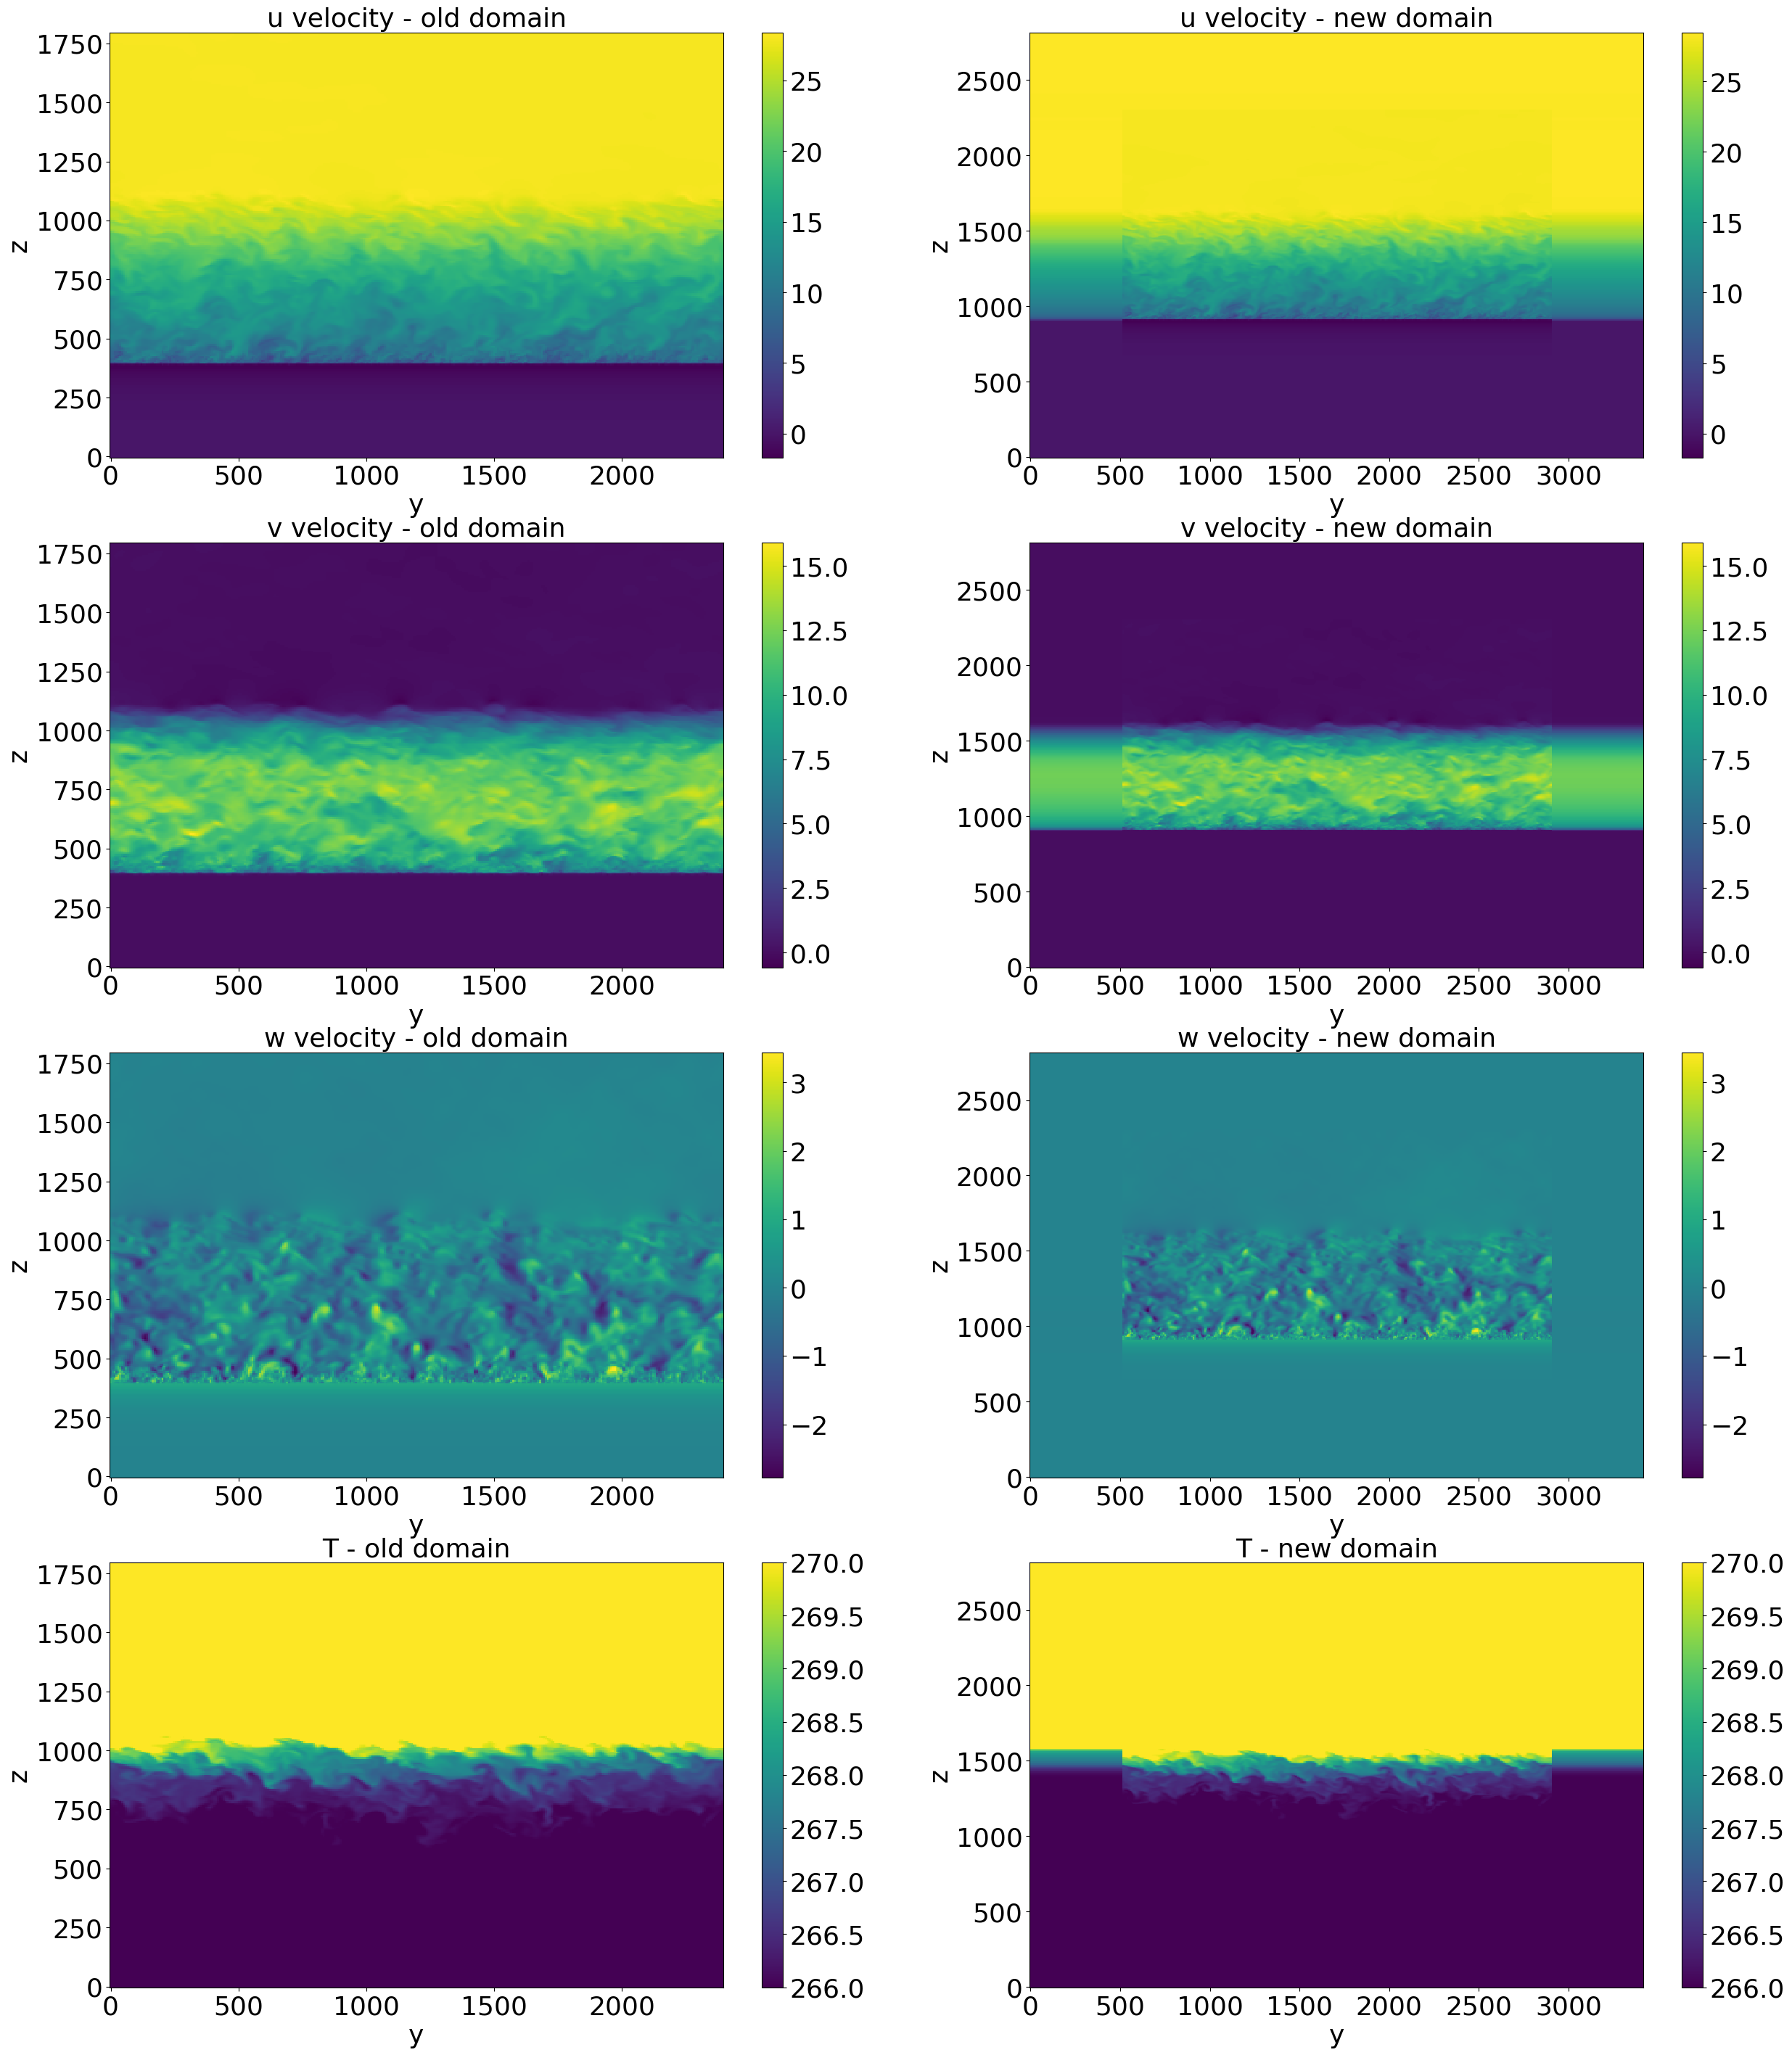

In [22]:
mpl.rcParams['axes.titlesize'] = 26
mpl.rcParams['axes.labelsize'] = 26
mpl.rcParams['legend.fontsize'] = 26
mpl.rcParams['xtick.labelsize'] = 26
mpl.rcParams['ytick.labelsize'] = 26

fig, axs = plt.subplots(nrows=4,ncols=2,figsize=(30,35))

# 1. u velocity:
yy = np.arange(lo0[0], hi0[0], dy0)
zz = np.arange(lo0[1], hi0[1], dz0)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
uvel = axs[0,0].pcolormesh(YY, ZZ, x0_velocity_bc[timesteps-1,:,:])
axs[0,0].set_xlabel("y")
axs[0,0].set_ylabel("z")
axs[0,0].set_title("u velocity - old domain")
fig.colorbar(uvel, ax=axs[0,0])

yy_new = np.arange(ylo0, yhi0, dy0)
zz_new = np.arange(zlo0, zhi0, dz0)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
uvel_new = axs[0,1].pcolormesh(YY_new, ZZ_new, velocity0_bc_new[timesteps-1,:,:,0])
axs[0,1].set_xlabel("y")
axs[0,1].set_ylabel("z")
axs[0,1].set_title("u velocity - new domain")
fig.colorbar(uvel_new, ax=axs[0,1])

# 2. v velocity:
yy = np.arange(lo0[0], hi0[0], dy0)
zz = np.arange(lo0[1], hi0[1], dz0)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
vvel = axs[1,0].pcolormesh(YY, ZZ, y0_velocity_bc[timesteps-1,:,:])
axs[1,0].set_xlabel("y")
axs[1,0].set_ylabel("z")
axs[1,0].set_title("v velocity - old domain")
fig.colorbar(vvel, ax=axs[1,0])

yy_new = np.arange(ylo0, yhi0, dy0)
zz_new = np.arange(zlo0, zhi0, dz0)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
vvel_new = axs[1,1].pcolormesh(YY_new, ZZ_new, velocity0_bc_new[timesteps-1,:,:,1])
axs[1,1].set_xlabel("y")
axs[1,1].set_ylabel("z")
axs[1,1].set_title("v velocity - new domain")
fig.colorbar(vvel_new, ax=axs[1,1])

# 3. w velocity:
yy = np.arange(lo0[0], hi0[0], dy0)
zz = np.arange(lo0[1], hi0[1], dz0)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
wvel = axs[2,0].pcolormesh(YY, ZZ, z0_velocity_bc[timesteps-1,:,:])
axs[2,0].set_xlabel("y")
axs[2,0].set_ylabel("z")
axs[2,0].set_title("w velocity - old domain")
fig.colorbar(wvel, ax=axs[2,0])

yy_new = np.arange(ylo0, yhi0, dy0)
zz_new = np.arange(zlo0, zhi0, dz0)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
wvel_new = axs[2,1].pcolormesh(YY_new, ZZ_new, velocity0_bc_new[timesteps-1,:,:,2])
axs[2,1].set_xlabel("y")
axs[2,1].set_ylabel("z")
axs[2,1].set_title("w velocity - new domain")
fig.colorbar(wvel_new, ax=axs[2,1])

# 4. T:
yy = np.arange(lo0[0], hi0[0], dy0)
zz = np.arange(lo0[1], hi0[1], dz0)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
wvel = axs[3,0].pcolormesh(YY, ZZ, temperature0_bc[timesteps-1,:,:],vmin=266,vmax=270)
axs[3,0].set_xlabel("y")
axs[3,0].set_ylabel("z")
axs[3,0].set_title("T - old domain")
fig.colorbar(wvel, ax=axs[3,0])

yy_new = np.arange(ylo0, yhi0, dy0)
zz_new = np.arange(zlo0, zhi0, dz0)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
wvel_new = axs[3,1].pcolormesh(YY_new, ZZ_new, temperature0_bc_new[timesteps-1,:,:],vmin=266,vmax=270)
axs[3,1].set_xlabel("y")
axs[3,1].set_ylabel("z")
axs[3,1].set_title("T - new domain")
fig.colorbar(wvel_new, ax=axs[3,1])


print(np.min(temperature0_bc_new[timesteps-1,:,:]))

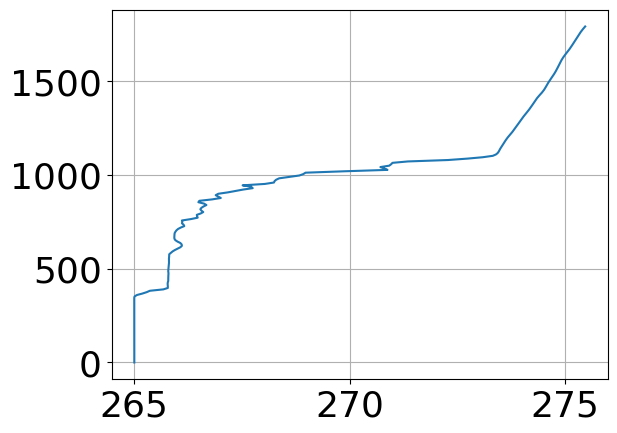

In [23]:
zz = np.arange(lo0[1], hi0[1], dz0)
plt.figure()
plt.grid()
plt.plot(temperature0_bc[-1,160,:],zz)

In [26]:
print(temperature0_bc_new.shape)

(10000, 456, 376)


In [27]:
temperature0_bc_new_mean = np.mean(temperature0_bc_new[-4000:],axis=(0,1)) # mean in both y dir. and time

In [29]:
for k in range(Nz0):
    zloc = k*dz0
    print(zloc-910.0, temperature0_bc_new_mean[k])

-910.0 262.6669
-902.5 262.6669
-895.0 262.6669
-887.5 262.6669
-880.0 262.6669
-872.5 262.6669
-865.0 262.6669
-857.5 262.6669
-850.0 262.6669
-842.5 262.6669
-835.0 262.6669
-827.5 262.6669
-820.0 262.6669
-812.5 262.6669
-805.0 262.6669
-797.5 262.6669
-790.0 262.6669
-782.5 262.6669
-775.0 262.6669
-767.5 262.6669
-760.0 262.6669
-752.5 262.6669
-745.0 262.6669
-737.5 262.6669
-730.0 262.6669
-722.5 262.6669
-715.0 262.6669
-707.5 262.6669
-700.0 262.6669
-692.5 262.6669
-685.0 262.6669
-677.5 262.667
-670.0 262.667
-662.5 262.667
-655.0 262.667
-647.5 262.667
-640.0 262.667
-632.5 262.667
-625.0 262.667
-617.5 262.667
-610.0 262.667
-602.5 262.66727
-595.0 262.66727
-587.5 262.66727
-580.0 262.66727
-572.5 262.6673
-565.0 262.6673
-557.5 262.6673
-550.0 262.6673
-542.5 262.66736
-535.0 262.66736
-527.5 262.66736
-520.0 262.6674
-512.5 262.6674
-505.0 262.6674
-497.5 262.6841
-490.0 262.6841
-482.5 262.6841
-475.0 262.6841
-467.5 262.6841
-460.0 262.68414
-452.5 262.6842
-445.0 262

In [30]:
for k in range(Nz0):
    zloc = k*dz0
    print(zloc-910.0, velocity0_bc_new[0,10,k,0], velocity0_bc_new[0,10,k,1], velocity0_bc_new[0,10,k,2], 0.0)

-910.0 0.0 0.0 0.0 0.0
-902.5 0.0 0.0 0.0 0.0
-895.0 0.0 0.0 0.0 0.0
-887.5 0.0 0.0 0.0 0.0
-880.0 0.0 0.0 0.0 0.0
-872.5 0.0 0.0 0.0 0.0
-865.0 0.0 0.0 0.0 0.0
-857.5 0.0 0.0 0.0 0.0
-850.0 0.0 0.0 0.0 0.0
-842.5 0.0 0.0 0.0 0.0
-835.0 0.0 0.0 0.0 0.0
-827.5 0.0 0.0 0.0 0.0
-820.0 0.0 0.0 0.0 0.0
-812.5 0.0 0.0 0.0 0.0
-805.0 0.0 0.0 0.0 0.0
-797.5 0.0 0.0 0.0 0.0
-790.0 0.0 0.0 0.0 0.0
-782.5 0.0 0.0 0.0 0.0
-775.0 0.0 0.0 0.0 0.0
-767.5 0.0 0.0 0.0 0.0
-760.0 0.0 0.0 0.0 0.0
-752.5 0.0 0.0 0.0 0.0
-745.0 0.0 0.0 0.0 0.0
-737.5 0.0 0.0 0.0 0.0
-730.0 0.0 0.0 0.0 0.0
-722.5 0.0 0.0 0.0 0.0
-715.0 0.0 0.0 0.0 0.0
-707.5 0.0 0.0 0.0 0.0
-700.0 0.0 0.0 0.0 0.0
-692.5 0.0 0.0 0.0 0.0
-685.0 0.0 0.0 0.0 0.0
-677.5 0.0 0.0 0.0 0.0
-670.0 0.0 0.0 0.0 0.0
-662.5 0.0 0.0 0.0 0.0
-655.0 0.0 0.0 0.0 0.0
-647.5 0.0 0.0 0.0 0.0
-640.0 0.0 0.0 0.0 0.0
-632.5 0.0 0.0 0.0 0.0
-625.0 0.0 0.0 0.0 0.0
-617.5 0.0 0.0 0.0 0.0
-610.0 0.0 0.0 0.0 0.0
-602.5 0.0 0.0 0.0 0.0
-595.0 0.0 0.0 0.0 0.0
-587.5 0.0 

In [30]:
for k in range(Nz0):
    zloc = k*dz0
    print(zloc-910.0, velocity0_bc_new[0,10,k,0], velocity0_bc_new[0,10,k,1], velocity0_bc_new[0,10,k,2], 0.0)

-910.0 0.0 0.0 0.0 0.0
-902.5 0.0 0.0 0.0 0.0
-895.0 0.0 0.0 0.0 0.0
-887.5 0.0 0.0 0.0 0.0
-880.0 0.0 0.0 0.0 0.0
-872.5 0.0 0.0 0.0 0.0
-865.0 0.0 0.0 0.0 0.0
-857.5 0.0 0.0 0.0 0.0
-850.0 0.0 0.0 0.0 0.0
-842.5 0.0 0.0 0.0 0.0
-835.0 0.0 0.0 0.0 0.0
-827.5 0.0 0.0 0.0 0.0
-820.0 0.0 0.0 0.0 0.0
-812.5 0.0 0.0 0.0 0.0
-805.0 0.0 0.0 0.0 0.0
-797.5 0.0 0.0 0.0 0.0
-790.0 0.0 0.0 0.0 0.0
-782.5 0.0 0.0 0.0 0.0
-775.0 0.0 0.0 0.0 0.0
-767.5 0.0 0.0 0.0 0.0
-760.0 0.0 0.0 0.0 0.0
-752.5 0.0 0.0 0.0 0.0
-745.0 0.0 0.0 0.0 0.0
-737.5 0.0 0.0 0.0 0.0
-730.0 0.0 0.0 0.0 0.0
-722.5 0.0 0.0 0.0 0.0
-715.0 0.0 0.0 0.0 0.0
-707.5 0.0 0.0 0.0 0.0
-700.0 0.0 0.0 0.0 0.0
-692.5 0.0 0.0 0.0 0.0
-685.0 0.0 0.0 0.0 0.0
-677.5 0.0 0.0 0.0 0.0
-670.0 0.0 0.0 0.0 0.0
-662.5 0.0 0.0 0.0 0.0
-655.0 0.0 0.0 0.0 0.0
-647.5 0.0 0.0 0.0 0.0
-640.0 0.0 0.0 0.0 0.0
-632.5 0.0 0.0 0.0 0.0
-625.0 0.0 0.0 0.0 0.0
-617.5 0.0 0.0 0.0 0.0
-610.0 0.0 0.0 0.0 0.0
-602.5 0.0 0.0 0.0 0.0
-595.0 0.0 0.0 0.0 0.0
-587.5 0.0 

# Level 1 - Old Domain

In [ ]:
ilengths1 = lengths1.astype(int) # domain size in the y and z dir.
ncells1 = xlo1_xvelocity_input.shape

nx1 = 1
ny1 = ncells1[1]
nz1 = ncells1[2]

Ly1 = ilengths1[0]
Lz1 = ilengths1[1]

dy1 = grid_size1[0]
dz1 = grid_size1[1]

x1_velocity_bc = xlo1_xvelocity_input.copy()
y1_velocity_bc = xlo1_yvelocity_input.copy()
z1_velocity_bc = xlo1_yvelocity_input.copy()
temperature1_bc = xlo1_temperature_input.copy()

In [ ]:
# mean velocity vs. z
uvel1_mean = np.mean(x1_velocity_bc,axis=(0,1)) # mean in both y dir. and time
vvel1_mean  = np.mean(y1_velocity_bc,axis=(0,1)) # mean in both y dir. and time
wvel1_mean  = np.mean(z1_velocity_bc,axis=(0,1)) # mean in both y dir. and time
temperature1_mean  = np.mean(temperature1_bc[-4000:],axis=(0,1)) # mean in both y dir. and time
print(temperature1_mean)

# Padding the existing domain with a laminar zone

In [ ]:
# Calculate the number of cells and domain size
# Additional increment in the domain:
#delta_Ly = 300
#delta_Lz = 120

delta_Ly = 1020
delta_Lz = 0

# Number of new cells
Ny1 = (np.rint((Ly1+delta_Ly)/grid_size1[0])).astype(int)
Nz1 = (np.rint((Lz1+delta_Lz)/grid_size1[1])).astype(int)
print(ny1, nz1)
print(Ny1, Nz1)

# New domain size
new_ilengths1 = [Ly1+delta_Ly, Lz1+delta_Lz]
Ly1_new = new_ilengths1[0]
Lz1_new = new_ilengths1[1]
print(Ly1, Lz1)
print(Ly1_new, Lz1_new)

# Extents of the new domain
ylo1 = lo1[0]
yhi1 = hi1[0] + delta_Ly

zlo1 = lo1[1]
zhi1 = hi1[1] + delta_Lz

#timesteps = (np.ceil(ntime[0]/10)).astype(int)
timesteps = ntime[0]
print(timesteps)

# Variables for storing velocity and temperature fields in the new domain
velocity1_bc_new = np.zeros((timesteps, Ny1, Nz1, 3),dtype='f')
temperature1_bc_new = np.full((timesteps, Ny1, Nz1),np.max(temperature1_mean))

#temperature0_bc_new = np.zeros((timesteps, Ny0, Nz0),dtype='f')
#vof_bc_new = np.zeros((ntime[0], Ny, Nz),dtype='f')

In [ ]:
# Old Domain
print(lo1[0], hi1[0])
print(lo1[1], hi1[1])

# New Domain
print(ylo1, yhi1)
print(zlo1, zhi1)

In [ ]:
# region of the new domain where information from the old domain need to be copied:
start_y = int(delta_Ly/2)
start_z = int(delta_Lz/2)
print(start_y, start_z)

end_y = start_y + Ly1
end_z = start_z + Lz1

# Fill data in the new domain for regions between yloc < start_y or yloc > end_y and zloc > start_z and zloc < end_z
# This is done by copying the variable profiles from the old domain data to the new

# Number of points from the left and bottom boundary to the location where filling begins:
Ny_from_left_boundary = (start_y/grid_size1[0]).astype(int) 
Nz_from_bottom_boundary = (start_z/grid_size1[1]).astype(int)  

uvelocity1_bc_new = np.zeros((Ny1, Nz1),dtype='f')
vvelocity1_bc_new = np.zeros((Ny1, Nz1),dtype='f')
wvelocity1_bc_new = np.zeros((Ny1, Nz1),dtype='f')
T1_bc_new = np.zeros((Ny1, Nz1),dtype='f')
#T1_bc_new = np.full((Ny1, Nz1),np.max(temperature1_mean))

for j in range(Ny1): # in the y dir
    for k in range(Nz1): # in the z dir
        yloc = j*dy1
        zloc = k*dz1

        if ((yloc < start_y or yloc > end_y) and (zloc >= start_z and zloc < end_z)):
            uvelocity1_bc_new[:,k] = uvel1_mean[k-Nz_from_bottom_boundary]
            vvelocity1_bc_new[:,k] = vvel1_mean[k-Nz_from_bottom_boundary]
            wvelocity1_bc_new[:,k] = wvel1_mean[k-Nz_from_bottom_boundary]
            T1_bc_new[:,k] = temperature1_mean[k-Nz_from_bottom_boundary]

velocity1_bc_new[:,:,:,0] = uvelocity1_bc_new[:,:]
velocity1_bc_new[:,:,:,1] = vvelocity1_bc_new[:,:]
velocity1_bc_new[:,:,:,2] = wvelocity1_bc_new[:,:]
temperature1_bc_new[:,:,:] = T1_bc_new[:,:]
print(T1_bc_new[10,:])
print(temperature1_bc_new[timesteps-1,:,:])
print(np.max(temperature1_bc_new[timesteps-1,:,:]))

In [ ]:
fig, axs = plt.subplots(nrows=4,ncols=2,figsize=(30,20))

# 1. u velocity:
yy = np.arange(lo1[0], hi1[0], dy1)
zz = np.arange(lo1[1], hi1[1], dz1)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
uvel = axs[0,0].pcolormesh(YY, ZZ, x1_velocity_bc[timesteps-1,:,:])
axs[0,0].set_xlabel("y")
axs[0,0].set_ylabel("z")
axs[0,0].set_title("u velocity - old domain")
fig.colorbar(uvel, ax=axs[0,0])

yy_new = np.arange(ylo1, yhi1, dy1)
zz_new = np.arange(zlo1, zhi1, dz1)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
uvel_new = axs[0,1].pcolormesh(YY_new, ZZ_new, velocity1_bc_new[timesteps-1,:,:,0])
axs[0,1].set_xlabel("y")
axs[0,1].set_ylabel("z")
axs[0,1].set_title("u velocity - new domain")
fig.colorbar(uvel_new, ax=axs[0,1])

# 2. v velocity:
yy = np.arange(lo1[0], hi1[0], dy1)
zz = np.arange(lo1[1], hi1[1], dz1)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
vvel = axs[1,0].pcolormesh(YY, ZZ, y1_velocity_bc[timesteps-1,:,:])
axs[1,0].set_xlabel("y")
axs[1,0].set_ylabel("z")
axs[1,0].set_title("v velocity - old domain")
fig.colorbar(vvel, ax=axs[1,0])

yy_new = np.arange(ylo1, yhi1, dy1)
zz_new = np.arange(zlo1, zhi1, dz1)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
vvel_new = axs[1,1].pcolormesh(YY_new, ZZ_new, velocity1_bc_new[timesteps-1,:,:,1])
axs[1,1].set_xlabel("y")
axs[1,1].set_ylabel("z")
axs[1,1].set_title("v velocity - new domain")
fig.colorbar(vvel_new, ax=axs[1,1])

# 3. w velocity:
yy = np.arange(lo1[0], hi1[0], dy1)
zz = np.arange(lo1[1], hi1[1], dz1)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
wvel = axs[2,0].pcolormesh(YY, ZZ, z1_velocity_bc[timesteps-1,:,:])
axs[2,0].set_xlabel("y")
axs[2,0].set_ylabel("z")
axs[2,0].set_title("w velocity - old domain")
fig.colorbar(wvel, ax=axs[2,0])

yy_new = np.arange(ylo1, yhi1, dy1)
zz_new = np.arange(zlo1, zhi1, dz1)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
wvel_new = axs[2,1].pcolormesh(YY_new, ZZ_new, velocity1_bc_new[timesteps-1,:,:,2])
axs[2,1].set_xlabel("y")
axs[2,1].set_ylabel("z")
axs[2,1].set_title("w velocity - new domain")
fig.colorbar(wvel_new, ax=axs[2,1])

# 4. T:
yy = np.arange(lo1[0], hi1[0], dy1)
zz = np.arange(lo1[1], hi1[1], dz1)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
wvel = axs[3,0].pcolormesh(YY, ZZ, temperature1_bc[timesteps-1,:,:])
axs[3,0].set_xlabel("y")
axs[3,0].set_ylabel("z")
axs[3,0].set_title("T - old domain")
fig.colorbar(wvel, ax=axs[3,0])

yy_new = np.arange(ylo1, yhi1, dy1)
zz_new = np.arange(zlo1, zhi1, dz1)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
wvel_new = axs[3,1].pcolormesh(YY_new, ZZ_new, temperature1_bc_new[timesteps-1,:,:])
axs[3,1].set_xlabel("y")
axs[3,1].set_ylabel("z")
axs[3,1].set_title("T - new domain")
fig.colorbar(wvel_new, ax=axs[3,1])

In [ ]:
# Region in the interior of the new domain where old data needs to be filled:
start_y = int(delta_Ly/2)
start_z = int(delta_Lz/2)

end_y = start_y + Ly1
end_z = start_z + Lz1

# Number of points from the left and bottom boundaries to the location where filling begins:
Ny_from_left_boundary = (start_y/grid_size1[0]).astype(int) + 1
Nz_from_bottom_boundary = (start_z/grid_size1[1]).astype(int) + 1

print(Ny1, Nz1)
print(Ny_from_left_boundary, Nz_from_bottom_boundary)

for j in range(Ny1): # in the y dir
    for k in range(Nz1): # in the z dir
        yloc = j*dy1
        zloc = k*dz1

        if (yloc > start_y and yloc < end_y and zloc > start_z and zloc < end_z):            
            velocity1_bc_new[:, j, k, 0] = np.copy(x1_velocity_bc[:, j-Ny_from_left_boundary, k-Nz_from_bottom_boundary])       
            velocity1_bc_new[:, j, k, 1] = np.copy(y1_velocity_bc[:, j-Ny_from_left_boundary, k-Nz_from_bottom_boundary])
            velocity1_bc_new[:, j, k, 2] = np.copy(z1_velocity_bc[:, j-Ny_from_left_boundary, k-Nz_from_bottom_boundary])
            temperature1_bc_new[:, j, k] = np.copy(temperature1_bc[:, j-Ny_from_left_boundary, k-Nz_from_bottom_boundary])
#            vof_bc_new[:, j, k] = np.copy(vof_bc[:, j-Ny_from_left_boundary, k-Nz_from_bottom_boundary])

In [ ]:
mpl.rcParams['axes.titlesize'] = 26
mpl.rcParams['axes.labelsize'] = 26
mpl.rcParams['legend.fontsize'] = 26
mpl.rcParams['xtick.labelsize'] = 26
mpl.rcParams['ytick.labelsize'] = 26

fig, axs = plt.subplots(nrows=4,ncols=2,figsize=(30,35))

# 1. u velocity:
yy = np.arange(lo1[0], hi1[0], dy1)
zz = np.arange(lo1[1], hi1[1], dz1)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
uvel = axs[0,0].pcolormesh(YY, ZZ, x1_velocity_bc[timesteps-1,:,:])
axs[0,0].set_xlabel("y")
axs[0,0].set_ylabel("z")
axs[0,0].set_title("u velocity - old domain")
fig.colorbar(uvel, ax=axs[0,0])

yy_new = np.arange(ylo1, yhi1, dy1)
zz_new = np.arange(zlo1, zhi1, dz1)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
uvel_new = axs[0,1].pcolormesh(YY_new, ZZ_new, velocity1_bc_new[timesteps-1,:,:,0])
axs[0,1].set_xlabel("y")
axs[0,1].set_ylabel("z")
axs[0,1].set_title("u velocity - new domain")
fig.colorbar(uvel_new, ax=axs[0,1])

# 2. v velocity:
yy = np.arange(lo1[0], hi1[0], dy1)
zz = np.arange(lo1[1], hi1[1], dz1)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
vvel = axs[1,0].pcolormesh(YY, ZZ, y1_velocity_bc[timesteps-1,:,:])
axs[1,0].set_xlabel("y")
axs[1,0].set_ylabel("z")
axs[1,0].set_title("v velocity - old domain")
fig.colorbar(vvel, ax=axs[1,0])

yy_new = np.arange(ylo1, yhi1, dy1)
zz_new = np.arange(zlo1, zhi1, dz1)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
vvel_new = axs[1,1].pcolormesh(YY_new, ZZ_new, velocity1_bc_new[timesteps-1,:,:,1])
axs[1,1].set_xlabel("y")
axs[1,1].set_ylabel("z")
axs[1,1].set_title("v velocity - new domain")
fig.colorbar(vvel_new, ax=axs[1,1])

# 3. w velocity:
yy = np.arange(lo1[0], hi1[0], dy1)
zz = np.arange(lo1[1], hi1[1], dz1)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
wvel = axs[2,0].pcolormesh(YY, ZZ, z1_velocity_bc[timesteps-1,:,:])
axs[2,0].set_xlabel("y")
axs[2,0].set_ylabel("z")
axs[2,0].set_title("w velocity - old domain")
fig.colorbar(wvel, ax=axs[2,0])

yy_new = np.arange(ylo1, yhi1, dy1)
zz_new = np.arange(zlo1, zhi1, dz1)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
wvel_new = axs[2,1].pcolormesh(YY_new, ZZ_new, velocity1_bc_new[timesteps-1,:,:,2])
axs[2,1].set_xlabel("y")
axs[2,1].set_ylabel("z")
axs[2,1].set_title("w velocity - new domain")
fig.colorbar(wvel_new, ax=axs[2,1])

# 4. T:
yy = np.arange(lo1[0], hi1[0], dy1)
zz = np.arange(lo1[1], hi1[1], dz1)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
wvel = axs[3,0].pcolormesh(YY, ZZ, temperature1_bc[timesteps-1,:,:],vmin=265.1,vmax=265.9)
axs[3,0].set_xlabel("y")
axs[3,0].set_ylabel("z")
axs[3,0].set_title("T - old domain")
fig.colorbar(wvel, ax=axs[3,0])

yy_new = np.arange(ylo1, yhi1, dy1)
zz_new = np.arange(zlo1, zhi1, dz1)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
wvel_new = axs[3,1].pcolormesh(YY_new, ZZ_new, temperature1_bc_new[timesteps-1,:,:],vmin=265.1,vmax=265.9)
axs[3,1].set_xlabel("y")
axs[3,1].set_ylabel("z")
axs[3,1].set_title("T - new domain")
fig.colorbar(wvel_new, ax=axs[3,1])

# Level 2 - Old Domain

In [ ]:
ilengths2 = lengths2.astype(int) # domain size in the y and z dir.
ncells2 = xlo2_xvelocity_input.shape

nx2 = 1
ny2 = ncells2[1]
nz2 = ncells2[2]

Ly2 = ilengths2[0]
Lz2 = ilengths2[1]

dy2 = grid_size2[0]
dz2 = grid_size2[1]

x2_velocity_bc = xlo2_xvelocity_input.copy()
y2_velocity_bc = xlo2_yvelocity_input.copy()
z2_velocity_bc = xlo2_yvelocity_input.copy()
temperature2_bc = xlo2_temperature_input.copy()
#vof_bc = xlo_vof_input.copy()

In [ ]:
uvel2_mean = np.mean(x2_velocity_bc,axis=(0,1)) # mean in both y dir. and time
vvel2_mean  = np.mean(y2_velocity_bc,axis=(0,1)) # mean in both y dir. and time
wvel2_mean  = np.mean(z2_velocity_bc,axis=(0,1)) # mean in both y dir. and time
temperature2_mean  = np.mean(temperature2_bc,axis=(0,1)) # mean in both y dir. and time

# Padding the existing domain with a laminar zone

In [ ]:
# Calculate the number of cells and domain size
# Additional increment in the domain:
#delta_Ly = 300
#delta_Lz = 120

delta_Ly = 1020
delta_Lz = 0

# Number of new cells
Ny2 = (np.rint((Ly2+delta_Ly)/grid_size2[0])).astype(int)
Nz2 = (np.rint((Lz2+delta_Lz)/grid_size2[1])).astype(int)
print(ny2, nz2)
print(Ny2, Nz2)

# New domain size
new_ilengths2 = [Ly2+delta_Ly, Lz2+delta_Lz]
Ly2_new = new_ilengths2[0]
Lz2_new = new_ilengths2[1]
print(Ly2, Lz2)
print(Ly2_new, Lz2_new)

# Extents of the new domain
ylo2 = lo2[0] 
yhi2 = hi2[0] + delta_Ly

zlo2 = lo2[1]
zhi2 = hi2[1] + delta_Lz

timesteps = ntime[0]
print(timesteps)

# Variables for storing velocity and temperature fields in the new domain
velocity2_bc_new = np.zeros((timesteps, Ny2, Nz2, 3),dtype='f')
temperature2_bc_new = np.full((timesteps, Ny2, Nz2),np.max(temperature2_mean))

#temperature0_bc_new = np.zeros((timesteps, Ny0, Nz0),dtype='f')
#vof_bc_new = np.zeros((ntime[0], Ny, Nz),dtype='f')

In [ ]:
# region of the new domain where information from the old domain need to be copied:
start_y = int(delta_Ly/2)
start_z = int(delta_Lz/2)
print(start_y, start_z)

end_y = start_y + Ly2
end_z = start_z + Lz2

# Fill data in the new domain for regions between yloc < start_y or yloc > end_y and zloc > start_z and zloc < end_z
# This is done by copying the variable profiles from the old domain data to the new

# Number of points from the left and bottom boundary to the location where filling begins:
Ny_from_left_boundary = (start_y/grid_size1[0]).astype(int) 
Nz_from_bottom_boundary = (start_z/grid_size1[1]).astype(int)  

uvelocity2_bc_new = np.zeros((Ny2, Nz2),dtype='f')
vvelocity2_bc_new = np.zeros((Ny2, Nz2),dtype='f')
wvelocity2_bc_new = np.zeros((Ny2, Nz2),dtype='f')
T2_bc_new = np.zeros((Ny2, Nz2),dtype='f')
#T1_bc_new = np.full((Ny1, Nz1),np.max(temperature1_mean))

for j in range(Ny2): # in the y dir
    for k in range(Nz2): # in the z dir
        yloc = j*dy2
        zloc = k*dz2

        if ((yloc < start_y or yloc > end_y) and (zloc >= start_z and zloc < end_z)):
            uvelocity2_bc_new[:,k] = uvel2_mean[k-Nz_from_bottom_boundary]
            vvelocity2_bc_new[:,k] = vvel2_mean[k-Nz_from_bottom_boundary]
            wvelocity2_bc_new[:,k] = wvel2_mean[k-Nz_from_bottom_boundary]
            T2_bc_new[:,k] = temperature2_mean[k-Nz_from_bottom_boundary]

velocity2_bc_new[:,:,:,0] = uvelocity2_bc_new[:,:]
velocity2_bc_new[:,:,:,1] = vvelocity2_bc_new[:,:]
velocity2_bc_new[:,:,:,2] = wvelocity2_bc_new[:,:]
temperature2_bc_new[:,:,:] = T2_bc_new[:,:]
print(T2_bc_new[10,:])

In [ ]:
fig, axs = plt.subplots(nrows=4,ncols=2,figsize=(30,20))

timesteps = (np.ceil(ntime[0]/10)).astype(int)
print(timesteps)

# 1. u velocity:
yy = np.arange(lo2[0], hi2[0], dy2)
zz = np.arange(lo2[1], hi2[1], dz2)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
uvel = axs[0,0].pcolormesh(YY, ZZ, x2_velocity_bc[timesteps-1,:,:])
axs[0,0].set_xlabel("y")
axs[0,0].set_ylabel("z")
axs[0,0].set_title("u velocity - old domain")
fig.colorbar(uvel, ax=axs[0,0])

yy_new = np.arange(ylo2, yhi2, dy2)
zz_new = np.arange(zlo2, zhi2, dz2)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
uvel_new = axs[0,1].pcolormesh(YY_new, ZZ_new, velocity2_bc_new[timesteps-1,:,:,0])
axs[0,1].set_xlabel("y")
axs[0,1].set_ylabel("z")
axs[0,1].set_title("u velocity - new domain")
fig.colorbar(uvel_new, ax=axs[0,1])

# 2. v velocity:
yy = np.arange(lo2[0], hi2[0], dy2)
zz = np.arange(lo2[1], hi2[1], dz2)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
vvel = axs[1,0].pcolormesh(YY, ZZ, y2_velocity_bc[timesteps-1,:,:])
axs[1,0].set_xlabel("y")
axs[1,0].set_ylabel("z")
axs[1,0].set_title("v velocity - old domain")
fig.colorbar(vvel, ax=axs[1,0])

yy_new = np.arange(ylo2, yhi2, dy2)
zz_new = np.arange(zlo2, zhi2, dz2)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
vvel_new = axs[1,1].pcolormesh(YY_new, ZZ_new, velocity2_bc_new[timesteps-1,:,:,1])
axs[1,1].set_xlabel("y")
axs[1,1].set_ylabel("z")
axs[1,1].set_title("v velocity - new domain")
fig.colorbar(vvel_new, ax=axs[1,1])

# 3. w velocity:
yy = np.arange(lo2[0], hi2[0], dy2)
zz = np.arange(lo2[1], hi2[1], dz2)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
wvel = axs[2,0].pcolormesh(YY, ZZ, z2_velocity_bc[timesteps-1,:,:])
axs[2,0].set_xlabel("y")
axs[2,0].set_ylabel("z")
axs[2,0].set_title("w velocity - old domain")
fig.colorbar(wvel, ax=axs[2,0])

yy_new = np.arange(ylo2, yhi2, dy2)
zz_new = np.arange(zlo2, zhi2, dz2)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
wvel_new = axs[2,1].pcolormesh(YY_new, ZZ_new, velocity2_bc_new[timesteps-1,:,:,2])
axs[2,1].set_xlabel("y")
axs[2,1].set_ylabel("z")
axs[2,1].set_title("w velocity - new domain")
fig.colorbar(wvel_new, ax=axs[2,1])

# 4. T:
yy = np.arange(lo2[0], hi2[0], dy2)
zz = np.arange(lo2[1], hi2[1], dz2)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
wvel = axs[3,0].pcolormesh(YY, ZZ, temperature2_bc[timesteps-1,:,:])
axs[3,0].set_xlabel("y")
axs[3,0].set_ylabel("z")
axs[3,0].set_title("T - old domain")
fig.colorbar(wvel, ax=axs[3,0])

yy_new = np.arange(ylo2, yhi2, dy2)
zz_new = np.arange(zlo2, zhi2, dz2)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
wvel_new = axs[3,1].pcolormesh(YY_new, ZZ_new, temperature2_bc_new[timesteps-1,:,:])
axs[3,1].set_xlabel("y")
axs[3,1].set_ylabel("z")
axs[3,1].set_title("T - new domain")
fig.colorbar(wvel_new, ax=axs[3,1])

In [ ]:
# Region in the interior of the new domain where old data needs to be filled:
start_y = int(delta_Ly/2)
start_z = int(delta_Lz/2)

end_y = start_y + Ly2
end_z = start_z + Lz2

# Number of points from the left and bottom boundaries to the location where filling begins:
Ny_from_left_boundary = (start_y/grid_size2[0]).astype(int) + 1
Nz_from_bottom_boundary = (start_z/grid_size2[1]).astype(int) + 1

print(Ny2, Nz2)
print(Ny_from_left_boundary, Nz_from_bottom_boundary)

for j in range(Ny2): # in the y dir
    for k in range(Nz2): # in the z dir
        yloc = j*dy2
        zloc = k*dz2

        if (yloc > start_y and yloc < end_y and zloc > start_z and zloc < end_z):            
            velocity2_bc_new[:, j, k, 0] = np.copy(x2_velocity_bc[:, j-Ny_from_left_boundary, k-Nz_from_bottom_boundary])       
            velocity2_bc_new[:, j, k, 1] = np.copy(y2_velocity_bc[:, j-Ny_from_left_boundary, k-Nz_from_bottom_boundary])
            velocity2_bc_new[:, j, k, 2] = np.copy(z2_velocity_bc[:, j-Ny_from_left_boundary, k-Nz_from_bottom_boundary])
            temperature2_bc_new[:, j, k] = np.copy(temperature2_bc[:, j-Ny_from_left_boundary, k-Nz_from_bottom_boundary])
#            vof_bc_new[:, j, k] = np.copy(vof_bc[:, j-Ny_from_left_boundary, k-Nz_from_bottom_boundary])

In [ ]:
mpl.rcParams['axes.titlesize'] = 26
mpl.rcParams['axes.labelsize'] = 26
mpl.rcParams['legend.fontsize'] = 26
mpl.rcParams['xtick.labelsize'] = 26
mpl.rcParams['ytick.labelsize'] = 26

fig, axs = plt.subplots(nrows=4,ncols=2,figsize=(30,35))

timesteps = (np.ceil(ntime[0]/10)).astype(int)
print(timesteps)

# 1. u velocity:
yy = np.arange(lo2[0], hi2[0], dy2)
zz = np.arange(lo2[1], hi2[1], dz2)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
uvel = axs[0,0].pcolormesh(YY, ZZ, x2_velocity_bc[timesteps-1,:,:])
axs[0,0].set_xlabel("y")
axs[0,0].set_ylabel("z")
axs[0,0].set_title("u velocity - old domain")
fig.colorbar(uvel, ax=axs[0,0])

yy_new = np.arange(ylo2, yhi2, dy2)
zz_new = np.arange(zlo2, zhi2, dz2)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
uvel_new = axs[0,1].pcolormesh(YY_new, ZZ_new, velocity2_bc_new[timesteps-1,:,:,0])
axs[0,1].set_xlabel("y")
axs[0,1].set_ylabel("z")
axs[0,1].set_title("u velocity - new domain")
fig.colorbar(uvel_new, ax=axs[0,1])

# 2. v velocity:
yy = np.arange(lo2[0], hi2[0], dy2)
zz = np.arange(lo2[1], hi2[1], dz2)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
vvel = axs[1,0].pcolormesh(YY, ZZ, y2_velocity_bc[timesteps-1,:,:])
axs[1,0].set_xlabel("y")
axs[1,0].set_ylabel("z")
axs[1,0].set_title("v velocity - old domain")
fig.colorbar(vvel, ax=axs[1,0])

yy_new = np.arange(ylo2, yhi2, dy2)
zz_new = np.arange(zlo2, zhi2, dz2)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
vvel_new = axs[1,1].pcolormesh(YY_new, ZZ_new, velocity2_bc_new[timesteps-1,:,:,1])
axs[1,1].set_xlabel("y")
axs[1,1].set_ylabel("z")
axs[1,1].set_title("v velocity - new domain")
fig.colorbar(vvel_new, ax=axs[1,1])

# 3. w velocity:
yy = np.arange(lo2[0], hi2[0], dy2)
zz = np.arange(lo2[1], hi2[1], dz2)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
wvel = axs[2,0].pcolormesh(YY, ZZ, z2_velocity_bc[timesteps-1,:,:])
axs[2,0].set_xlabel("y")
axs[2,0].set_ylabel("z")
axs[2,0].set_title("w velocity - old domain")
fig.colorbar(wvel, ax=axs[2,0])

yy_new = np.arange(ylo2, yhi2, dy2)
zz_new = np.arange(zlo2, zhi2, dz2)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
wvel_new = axs[2,1].pcolormesh(YY_new, ZZ_new, velocity2_bc_new[timesteps-1,:,:,2])
axs[2,1].set_xlabel("y")
axs[2,1].set_ylabel("z")
axs[2,1].set_title("w velocity - new domain")
fig.colorbar(wvel_new, ax=axs[2,1])

# 4. T:
yy = np.arange(lo2[0], hi2[0], dy2)
zz = np.arange(lo2[1], hi2[1], dz2)
YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
wvel = axs[3,0].pcolormesh(YY, ZZ, temperature2_bc[timesteps-1,:,:])
axs[3,0].set_xlabel("y")
axs[3,0].set_ylabel("z")
axs[3,0].set_title("T - old domain")
fig.colorbar(wvel, ax=axs[3,0])

yy_new = np.arange(ylo2, yhi2, dy2)
zz_new = np.arange(zlo2, zhi2, dz2)
YY_new, ZZ_new = np.meshgrid(yy_new, zz_new, indexing='ij')
wvel_new = axs[3,1].pcolormesh(YY_new, ZZ_new, temperature2_bc_new[timesteps-1,:,:])
axs[3,1].set_xlabel("y")
axs[3,1].set_ylabel("z")
axs[3,1].set_title("T - new domain")
fig.colorbar(wvel_new, ax=axs[3,1])

In [ ]:
############################## Appendix ############################
print(velocity_bc[:, 91, 90, 0])
print(velocity_bc_new[:, 105, 104, 0])

In [ ]:
x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 4, 9])
plt.scatter(x,y)

# Polynomial extrapolation
p = np.polyfit(x, y, deg=2)
x_new = np.array([4, 5])
y_new = np.polyval(p, x_new)
plt.plot(x_new,y_new)

In [ ]:
############################# Output: #################################

In [ ]:
print(time_bc[1]-time_bc[0])
print(time_bc[2]-time_bc[1])
print(np.average(np.diff(time_bc)))
final_time = time_bc[-1]-time_bc[0]

In [ ]:
print(time_size)
dt= np.average(np.diff(time_bc))

diff_time_bc = np.diff(time_bc)
print(diff_time_bc)

time_bc_avg = np.average(np.diff(time_bc))*10
print(time_bc_avg)

print(time_bc_avg*time_size)

times_in_seconds = np.arange(0.0,final_time,time_bc_avg)
print(times_in_seconds)
print(np.size(times_in_seconds))
#time_in_seconds = []
#for i in range(diff_time_bc): # in the y dir
#    time_in_seconds[i] = time_in_seconds[i] + .append(diff_time_bc

In [ ]:
# outfile = Path(template_file.parent, synthetic_bcs.nc)
with Dataset(outfile, "w", format="NETCDF4") as rootgrp:
    ## ~~~~~~~~ Operate on the root group ~~~~~~~~
    # Add dimensions to the root group
    rootgrp.createDimension('sdim', 1)
    rootgrp.createDimension('pdim', 2)
    rootgrp.createDimension('vdim', 3)
    rootgrp.createDimension('nt', None)
    
    # Add groups
    grp_xlo = rootgrp.createGroup("/xlo")
    
    # Add variables    
    rootgrp.createVariable("time","f8",("nt",))
    rootgrp['time'][:] = times_in_seconds

    ## ~~~~~~~~ Operate on the xlo and ylo groups ~~~~~~~~
    # No need to add dimensions

    # Add variables
    grp_xlo.createVariable("normal","i4",)
    grp_xlo.createVariable("side","i4",)
    grp_xlo.createVariable("perpendicular","i4",("pdim",))
    
    grp_xlo['normal'][:] = 0
    grp_xlo['side'][:] = 0
    grp_xlo['perpendicular'][:] = [1, 2]

    ## ~~~~~~~~ Operate on the xlo/level_0 and ylo/level_0 groups ~~~~~~~~
    # Add groups
    grp_xlo_l0 = grp_xlo.createGroup('/level_0')

    # Add dimensions
    grp_xlo_l0.createDimension('nx', nx0)
    grp_xlo_l0.createDimension('ny', Ny0)
    grp_xlo_l0.createDimension('nz', Nz0)

    # No need to add groups
    
    # Add variables
    grp_xlo_l0.createVariable("lengths","f8",("pdim",))
    grp_xlo_l0.createVariable("lo","f8",("pdim",))
    grp_xlo_l0.createVariable("hi","f8",("pdim",))
    grp_xlo_l0.createVariable("dx","f8",("pdim",))
    grp_xlo_l0.createVariable("velocity","f8",("nt", "ny", "nz", "vdim",))
    grp_xlo_l0.createVariable("temperature","f8",("nt", "ny", "nz",))
#    grp_xlo_l0.createVariable("vof","f8",("nt", "ny", "nz",))
    
    grp_xlo_l0['lengths'][:] = [Ly0_new, Lz0_new]
    grp_xlo_l0['lo'][:] = [ylo0, zlo0]
    grp_xlo_l0['hi'][:] = [yhi0, zhi0]
    grp_xlo_l0['dx'][:] = [dy0, dz0]
    grp_xlo_l0['velocity'][:] = velocity0_bc_new
    grp_xlo_l0['temperature'][:] = temperature0_bc_new
#    grp_xlo_l0['vof'][:] = vof_bc_new
    
    print("hello")
    print(nx0, Ny0, Nz0)
    print(grp_xlo_l0['lengths'][:])
    print(grp_xlo_l0['velocity'])
    print(grp_xlo_l0['lo'][:])
    print(grp_xlo_l0['hi'][:])
    print(grp_xlo_l0['dx'][:])

    ## ~~~~~~~~ Operate on the xlo/level_1 and ylo/level_1 groups ~~~~~~~~
    # Add groups
    grp_xlo_l1 = grp_xlo.createGroup('/level_1')

    # Add dimensions
    grp_xlo_l1.createDimension('nx', nx1)
    grp_xlo_l1.createDimension('ny', Ny1)
    grp_xlo_l1.createDimension('nz', Nz1)

    # No need to add groups
    
    # Add variables
    grp_xlo_l1.createVariable("lengths","f8",("pdim",))
    grp_xlo_l1.createVariable("lo","f8",("pdim",))
    grp_xlo_l1.createVariable("hi","f8",("pdim",))
    grp_xlo_l1.createVariable("dx","f8",("pdim",))
    grp_xlo_l1.createVariable("velocity","f8",("nt", "ny", "nz", "vdim",))
    grp_xlo_l1.createVariable("temperature","f8",("nt", "ny", "nz",))
    grp_xlo_l1.createVariable("vof","f8",("nt", "ny", "nz",))
    
    grp_xlo_l1['lengths'][:] = [Ly1_new, Lz1_new]
    grp_xlo_l1['lo'][:] = [ylo1, zlo1+(delta_Ly/2)]
    grp_xlo_l1['hi'][:] = [yhi1, zhi1+(delta_Ly/2)]
    grp_xlo_l1['dx'][:] = [dy1, dz1]
    grp_xlo_l1['velocity'][:] = velocity1_bc_new
    grp_xlo_l1['temperature'][:] = temperature1_bc_new
#    grp_xlo_l0['vof'][:] = vof_bc_new
    
    print("hello")
    print(nx1, Ny1, Nz1)
    print(grp_xlo_l1['lengths'][:])
    print(grp_xlo_l1['velocity'])
    print(grp_xlo_l1['lo'][:])
    print(grp_xlo_l1['hi'][:])
    print(grp_xlo_l1['dx'][:])

    ## ~~~~~~~~ Operate on the xlo/level_2 and ylo/level_2 groups ~~~~~~~~
    # Add groups
    grp_xlo_l2 = grp_xlo.createGroup('/level_2')

    # Add dimensions
    grp_xlo_l2.createDimension('nx', nx2)
    grp_xlo_l2.createDimension('ny', Ny2)
    grp_xlo_l2.createDimension('nz', Nz2)

    # No need to add groups
    
    # Add variables
    grp_xlo_l2.createVariable("lengths","f8",("pdim",))
    grp_xlo_l2.createVariable("lo","f8",("pdim",))
    grp_xlo_l2.createVariable("hi","f8",("pdim",))
    grp_xlo_l2.createVariable("dx","f8",("pdim",))
    grp_xlo_l2.createVariable("velocity","f8",("nt", "ny", "nz", "vdim",))
    grp_xlo_l2.createVariable("temperature","f8",("nt", "ny", "nz",))
#    grp_xlo_l2.createVariable("vof","f8",("nt", "ny", "nz",))
    
    grp_xlo_l2['lengths'][:] = [Ly2_new, Lz2_new]
    grp_xlo_l2['lo'][:] = [ylo2, zlo2+(delta_Ly/2)]
    grp_xlo_l2['hi'][:] = [yhi2, zhi2+(delta_Ly/2)]
    grp_xlo_l2['dx'][:] = [dy2, dz2]
    grp_xlo_l2['velocity'][:] = velocity2_bc_new
    grp_xlo_l2['temperature'][:] = temperature2_bc_new
#    grp_xlo_l0['vof'][:] = vof_bc_new
    
    print("hello")
    print(nx1, Ny1, Nz1)
    print(grp_xlo_l2['lengths'][:])
    print(grp_xlo_l2['velocity'])
    print(grp_xlo_l2['lo'][:])
    print(grp_xlo_l2['hi'][:])
    print(grp_xlo_l2['dx'][:])

    print()
    print(Ly0_new, Lz0_new)
    print(Ly1_new, Lz1_new)
    print(Ly2_new, Lz2_new)


In [ ]:
# outfile = Path(template_file.parent, synthetic_bcs.nc)
with Dataset(outfile, "w", format="NETCDF4") as rootgrp:
    ## ~~~~~~~~ Operate on the root group ~~~~~~~~
    # Add dimensions to the root group
    rootgrp.createDimension('sdim', 1)
    rootgrp.createDimension('pdim', 2)
    rootgrp.createDimension('vdim', 3)
    rootgrp.createDimension('nt', None)
    
    # Add groups
    grp_xlo = rootgrp.createGroup("/xlo")
    
    # Add variables    
    rootgrp.createVariable("time","f8",("nt",))
    rootgrp['time'][:] = times_in_seconds

    ## ~~~~~~~~ Operate on the xlo and ylo groups ~~~~~~~~
    # No need to add dimensions

    # Add variables
    grp_xlo.createVariable("normal","i4",)
    grp_xlo.createVariable("side","i4",)
    grp_xlo.createVariable("perpendicular","i4",("pdim",))
    
    grp_xlo['normal'][:] = 0
    grp_xlo['side'][:] = 0
    grp_xlo['perpendicular'][:] = [1, 2]

    ## ~~~~~~~~ Operate on the xlo/level_0 and ylo/level_0 groups ~~~~~~~~
    # Add groups
    grp_xlo_l0 = grp_xlo.createGroup('/level_0')

    # Add dimensions
    grp_xlo_l0.createDimension('nx', nx0)
    grp_xlo_l0.createDimension('ny', Ny0)
    grp_xlo_l0.createDimension('nz', Nz0)

    # No need to add groups
    
    # Add variables
    grp_xlo_l0.createVariable("lengths","f8",("pdim",))
    grp_xlo_l0.createVariable("lo","f8",("pdim",))
    grp_xlo_l0.createVariable("hi","f8",("pdim",))
    grp_xlo_l0.createVariable("dx","f8",("pdim",))
    grp_xlo_l0.createVariable("velocity","f8",("nt", "ny", "nz", "vdim",))
    grp_xlo_l0.createVariable("temperature","f8",("nt", "ny", "nz",))
#    grp_xlo_l0.createVariable("vof","f8",("nt", "ny", "nz",))
    
    grp_xlo_l0['lengths'][:] = [Ly0_new, Lz0_new]
    grp_xlo_l0['lo'][:] = [ylo0, zlo0]
    grp_xlo_l0['hi'][:] = [yhi0, zhi0]
    grp_xlo_l0['dx'][:] = [dy0, dz0]
    grp_xlo_l0['velocity'][:] = velocity0_bc_new
    grp_xlo_l0['temperature'][:] = temperature0_bc_new
#    grp_xlo_l0['vof'][:] = vof_bc_new
    
    print("hello")
    print(nx0, Ny0, Nz0)
    print(grp_xlo_l0['lengths'][:])
    print(grp_xlo_l0['velocity'])
    print(grp_xlo_l0['lo'][:])
    print(grp_xlo_l0['hi'][:])
    print(grp_xlo_l0['dx'][:])

In [ ]:
with Dataset(template_file, "r") as template:
    print("template['xlo']['level_0']", template['xlo']['level_0'])
    print("template['xlo']['level_0'].dimensions", template['xlo']['level_0'].dimensions)
    print("template['xlo']['level_0'].variables", template['xlo']['level_0'].variables)
    print("template['xlo']['level_0']['lengths'][:]", template['xlo']['level_0']['lengths'][:])
    print("template['xlo']['level_0']['lo'][:]", template['xlo']['level_0']['lo'][:])
    print("template['xlo']['level_0']['hi'][:]", template['xlo']['level_0']['hi'][:])
    print("template['xlo']['level_0']['dx'][:]", template['xlo']['level_0']['dx'][:])
    print("template['xlo']['level_0']['velocity'][-5:,0,0,:]", template['xlo']['level_0']['velocity'][-5:,0,0,:])
    print("template['xlo']['level_0']['temperature'][-5:,0,0]", template['xlo']['level_0']['temperature'][-5:,0,0])
    print("template['xlo'].groups", template['xlo'].groups)

print()


with Dataset(outfile, "r") as rootgrp:
    print("rootgrp['xlo']['level_0']", rootgrp['xlo']['level_0'])
    print("rootgrp['xlo']['level_0'].dimensions", rootgrp['xlo']['level_0'].dimensions)
    print("rootgrp['xlo']['level_0'].variables", rootgrp['xlo']['level_0'].variables)
    print("rootgrp['xlo']['level_0']['lengths'][:]", rootgrp['xlo']['level_0']['lengths'][:])
    print("rootgrp['xlo']['level_0']['lo'][:]", rootgrp['xlo']['level_0']['lo'][:])
    print("rootgrp['xlo']['level_0']['hi'][:]", rootgrp['xlo']['level_0']['hi'][:])
    print("rootgrp['xlo']['level_0']['dx'][:]", rootgrp['xlo']['level_0']['dx'][:])
    print("rootgrp['xlo']['level_0']['velocity'][-5:,0,0,:]", rootgrp['xlo']['level_0']['velocity'][-5:,0,0,:])
    print("rootgrp['xlo']['level_0']['temperature'][-5:,0,0]", rootgrp['xlo']['level_0']['temperature'][-5:,0,0])
    print("rootgrp['xlo'].groups", rootgrp['xlo'].groups)

In [ ]:
with Dataset(template_file, "r") as template:
    print("template['xlo']['level_1']", template['xlo']['level_1'])
    print("template['xlo']['level_1'].dimensions", template['xlo']['level_1'].dimensions)
    print("template['xlo']['level_1'].variables", template['xlo']['level_1'].variables)
    print("template['xlo']['level_1']['lengths'][:]", template['xlo']['level_1']['lengths'][:])
    print("template['xlo']['level_1']['lo'][:]", template['xlo']['level_1']['lo'][:])
    print("template['xlo']['level_1']['hi'][:]", template['xlo']['level_1']['hi'][:])
    print("template['xlo']['level_1']['dx'][:]", template['xlo']['level_1']['dx'][:])
    print("template['xlo']['level_1']['velocity'][-5:,0,0,:]", template['xlo']['level_1']['velocity'][-5:,0,0,:])
    print("template['xlo']['level_1']['temperature'][-5:,0,0]", template['xlo']['level_1']['temperature'][-5:,0,0])
    print("template['xlo'].groups", template['xlo'].groups)

print()


with Dataset(outfile, "r") as rootgrp:
    print("rootgrp['xlo']['level_1']", rootgrp['xlo']['level_1'])
    print("rootgrp['xlo']['level_1'].dimensions", rootgrp['xlo']['level_1'].dimensions)
    print("rootgrp['xlo']['level_1'].variables", rootgrp['xlo']['level_1'].variables)
    print("rootgrp['xlo']['level_1']['lengths'][:]", rootgrp['xlo']['level_1']['lengths'][:])
    print("rootgrp['xlo']['level_1']['lo'][:]", rootgrp['xlo']['level_1']['lo'][:])
    print("rootgrp['xlo']['level_1']['hi'][:]", rootgrp['xlo']['level_1']['hi'][:])
    print("rootgrp['xlo']['level_1']['dx'][:]", rootgrp['xlo']['level_1']['dx'][:])
    print("rootgrp['xlo']['level_1']['velocity'][-5:,0,0,:]", rootgrp['xlo']['level_1']['velocity'][-5:,0,0,:])
    print("rootgrp['xlo']['level_1']['temperature'][-5:,0,0]", rootgrp['xlo']['level_1']['temperature'][-5:,0,0])
    print("rootgrp['xlo'].groups", rootgrp['xlo'].groups)

In [ ]:
with Dataset(template_file, "r") as template:
    print("template['xlo']['level_2']", template['xlo']['level_2'])
    print("template['xlo']['level_2'].dimensions", template['xlo']['level_2'].dimensions)
    print("template['xlo']['level_2'].variables", template['xlo']['level_2'].variables)
    print("template['xlo']['level_2']['lengths'][:]", template['xlo']['level_2']['lengths'][:])
    print("template['xlo']['level_2']['lo'][:]", template['xlo']['level_2']['lo'][:])
    print("template['xlo']['level_2']['hi'][:]", template['xlo']['level_2']['hi'][:])
    print("template['xlo']['level_2']['dx'][:]", template['xlo']['level_2']['dx'][:])
    print("template['xlo']['level_2']['velocity'][-5:,0,0,:]", template['xlo']['level_2']['velocity'][-5:,0,0,:])
    print("template['xlo']['level_2']['temperature'][-5:,0,0]", template['xlo']['level_2']['temperature'][-5:,0,0])
    print("template['xlo'].groups", template['xlo'].groups)

print()


with Dataset(outfile, "r") as rootgrp:
    print("rootgrp['xlo']['level_2']", rootgrp['xlo']['level_2'])
    print("rootgrp['xlo']['level_2'].dimensions", rootgrp['xlo']['level_2'].dimensions)
    print("rootgrp['xlo']['level_2'].variables", rootgrp['xlo']['level_2'].variables)
    print("rootgrp['xlo']['level_2']['lengths'][:]", rootgrp['xlo']['level_2']['lengths'][:])
    print("rootgrp['xlo']['level_2']['lo'][:]", rootgrp['xlo']['level_2']['lo'][:])
    print("rootgrp['xlo']['level_2']['hi'][:]", rootgrp['xlo']['level_2']['hi'][:])
    print("rootgrp['xlo']['level_2']['dx'][:]", rootgrp['xlo']['level_2']['dx'][:])
    print("rootgrp['xlo']['level_2']['velocity'][-5:,0,0,:]", rootgrp['xlo']['level_2']['velocity'][-5:,0,0,:])
    print("rootgrp['xlo']['level_2']['temperature'][-5:,0,0]", rootgrp['xlo']['level_2']['temperature'][-5:,0,0])
    print("rootgrp['xlo'].groups", rootgrp['xlo'].groups)